In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [10]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import config

from utils import Visualizer
from binance import DataReader

In [11]:
window = 1000

In [20]:
# df = DataReader.read_trade(f"{config.trade_logs_binance_data_dir}DOGEUSDT.csv")
df = DataReader.read_trade_from_directory(f"{config.trade_logs_id_binance_data_dir}DOGEUSDT/")
df

id     price     qty    quoteQty  isBuyerMaker
time                                                                          
2021-04-17 12:51:46.343  173000000  0.323712    40.0   12.948480         False
2021-04-17 12:51:46.343  173000001  0.323723  1393.0  450.946139         False
2021-04-17 12:51:46.350  173000002  0.323545    25.0    8.088625         False
2021-04-17 12:51:46.350  173000003  0.323545    25.0    8.088625         False
2021-04-17 12:51:46.351  173000004  0.323527    25.0    8.088175          True
...                            ...       ...     ...         ...           ...
2021-04-17 14:34:06.902  173999995  0.309337    47.0   14.538839         False
2021-04-17 14:34:06.902  173999996  0.309351   953.0  294.811503         False
2021-04-17 14:34:06.914  173999997  0.309325   100.0   30.932500         False
2021-04-17 14:34:06.914  173999998  0.309351   638.0  197.365938         False
2021-04-17 14:34:06.925  173999999  0.309278  1673.0  517.422094          True

[1000000 rows x 5 columns]

In [21]:
df["side_integer"] = df["isBuyerMaker"].apply(lambda v: 1 if v == False else -1)
df["side_volume"] = df.apply(lambda row: row["qty"] if row["isBuyerMaker"] == False else -1 * row["qty"], axis=1)
    
df["sum_volume"] = df["side_volume"].rolling(window).sum()
df["sum_count"] = df["side_integer"].rolling(window).sum()

df["isBuyerMaker"][ df["isBuyerMaker"] == False ] = "buy"
df["isBuyerMaker"][ df["isBuyerMaker"] == True ] = "sell"

df = df.dropna()
df

<ipython-input-21-90667d044cb4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isBuyerMaker"][ df["isBuyerMaker"] == False ] = "buy"


id     price     qty    quoteQty isBuyerMaker  \
time                                                                            
2021-04-17 12:51:48.812  173000999  0.322650   100.0   32.265000         sell   
2021-04-17 12:51:48.812  173001000  0.322451  1041.0  335.671491         sell   
2021-04-17 12:51:48.825  173001001  0.322700   100.0   32.270000         sell   
2021-04-17 12:51:48.827  173001002  0.322773   139.0   44.865447          buy   
2021-04-17 12:51:48.828  173001003  0.322773    61.0   19.689153          buy   
...                            ...       ...     ...         ...          ...   
2021-04-17 14:34:06.902  173999995  0.309337    47.0   14.538839          buy   
2021-04-17 14:34:06.902  173999996  0.309351   953.0  294.811503          buy   
2021-04-17 14:34:06.914  173999997  0.309325   100.0   30.932500          buy   
2021-04-17 14:34:06.914  173999998  0.309351   638.0  197.365938          buy   
2021-04-17 14:34:06.925  173999999  0.309278  1673.0  517.422094         sell   

                         side_integer  side_volume  sum_volume  sum_count  
time                                                                       
2021-04-17 12:51:48.812            -1       -100.0    -38584.0      -58.0  
2021-04-17 12:51:48.812            -1      -1041.0    -39665.0      -60.0  
2021-04-17 12:51:48.825            -1       -100.0    -41158.0      -62.0  
2021-04-17 12:51:48.827             1        139.0    -41044.0      -62.0  
2021-04-17 12:51:48.828             1         61.0    -41008.0      -62.0  
...                               ...          ...         ...        ...  
2021-04-17 14:34:06.902             1         47.0   -126211.0       62.0  
2021-04-17 14:34:06.902             1        953.0   -125285.0       62.0  
2021-04-17 14:34:06.914             1        100.0   -125230.0       62.0  
2021-04-17 14:34:06.914             1        638.0   -124610.0       62.0  
2021-04-17 14:34:06.925            -1      -1673.0   -126483.0       60.0  

[999001 rows x 9 columns]

In [22]:
def plot(series1, series2):
    fig, axs = plt.subplots(1, 1, figsize=(15,8), sharex=True)

    fig.subplots_adjust(hspace=0)

    color1 = 'tab:blue'
    axs.set_ylabel("price", color=color1)
    axs.plot(series1, color=color1) 

    color2 = 'tab:orange'
    ax2 = axs.twinx()
    ax2.set_ylabel("sum_count", color=color2)
    ax2.plot(series2, color=color2, alpha=0.5)
    ax2.plot(pd.Series(np.zeros(series2.shape[0]), index=series2.index), color="black")
    plt.show()

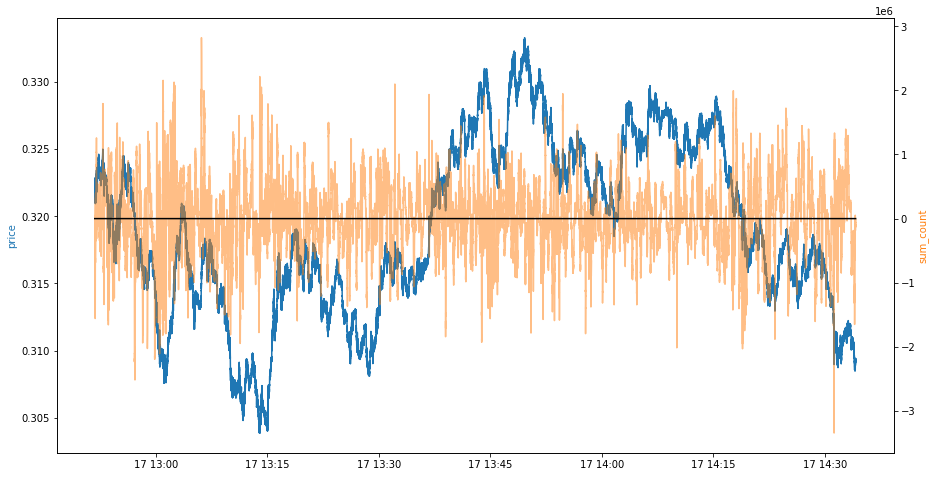

In [23]:
plot(df["price"], df["sum_volume"])

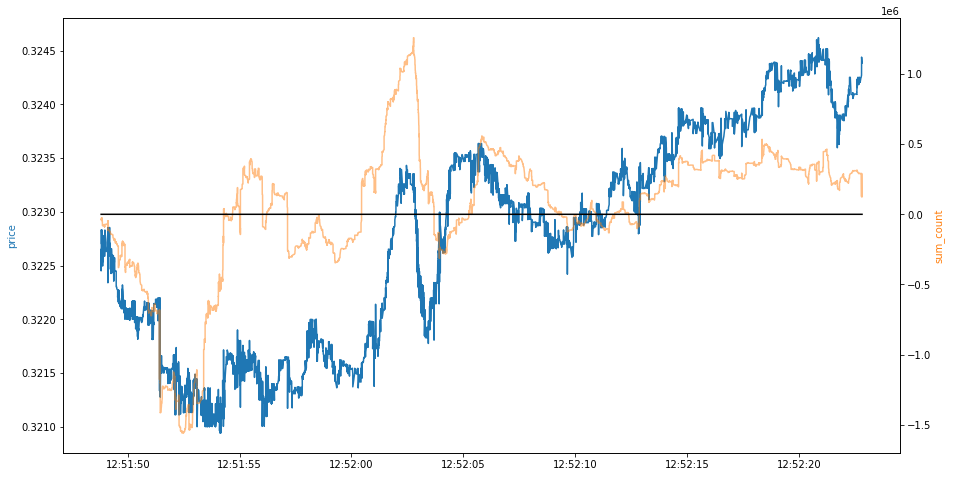

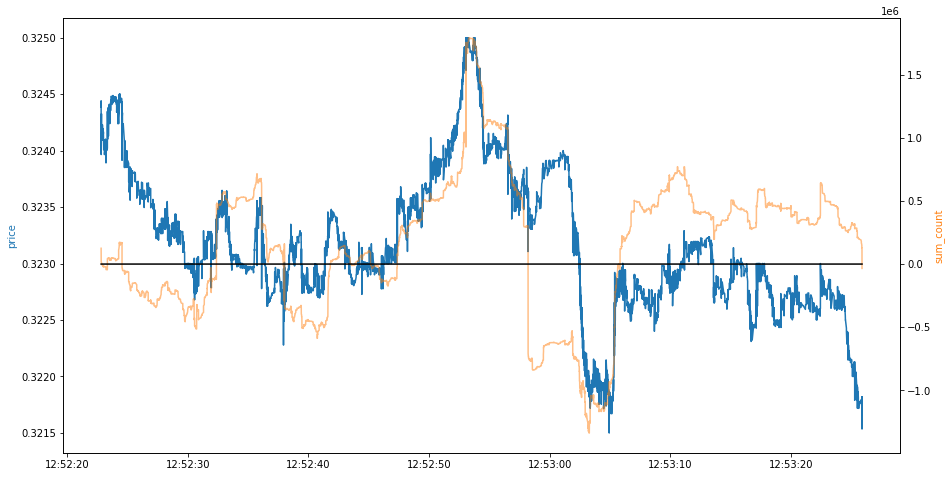

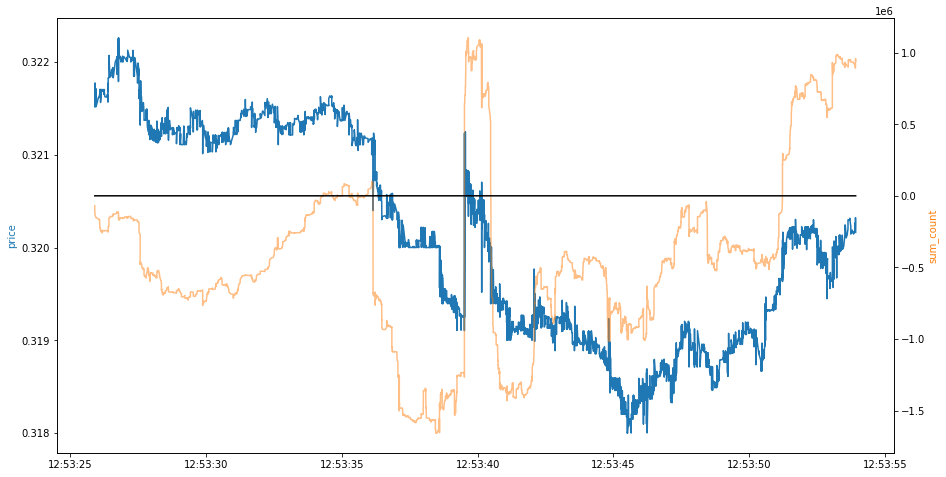

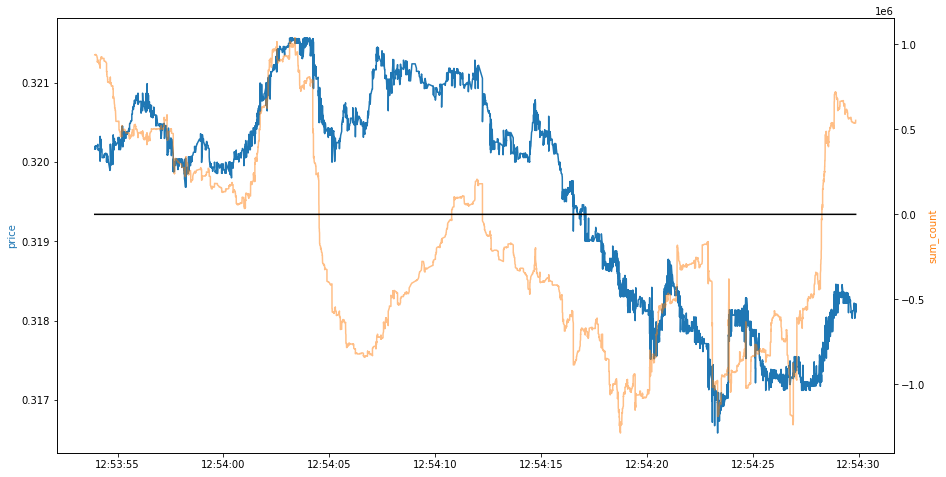

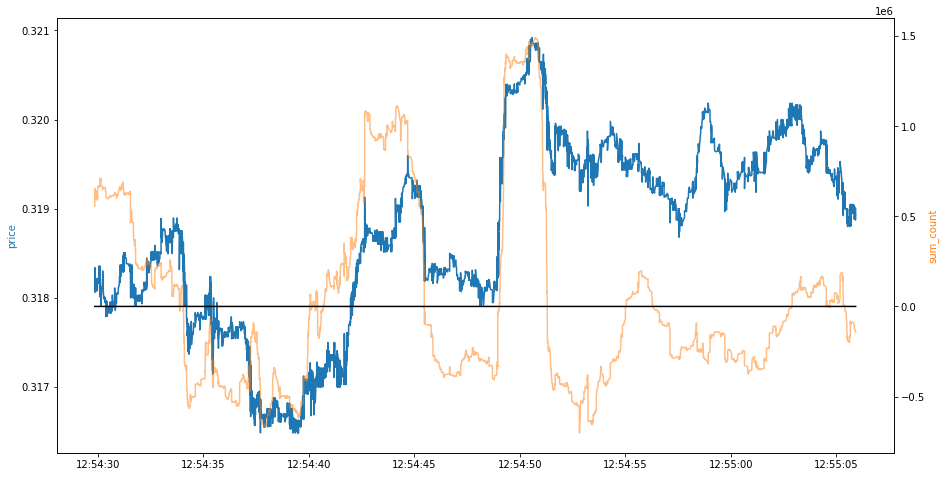

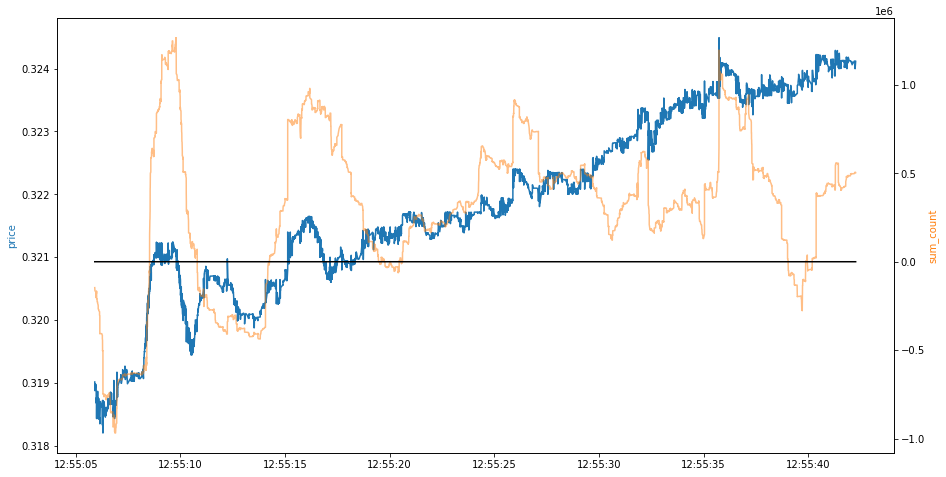

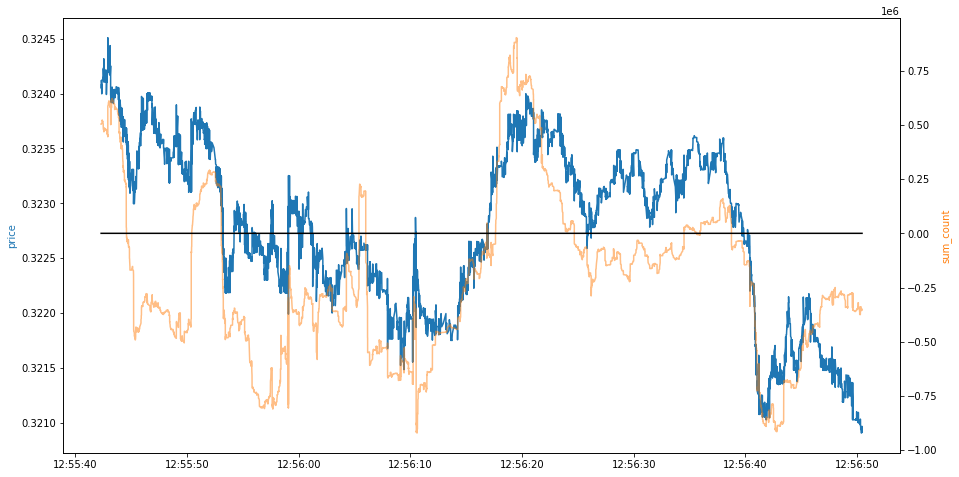

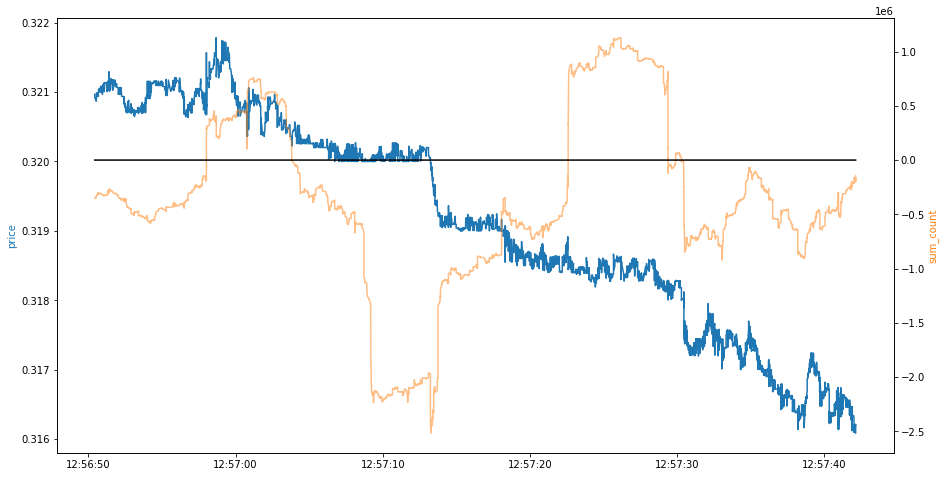

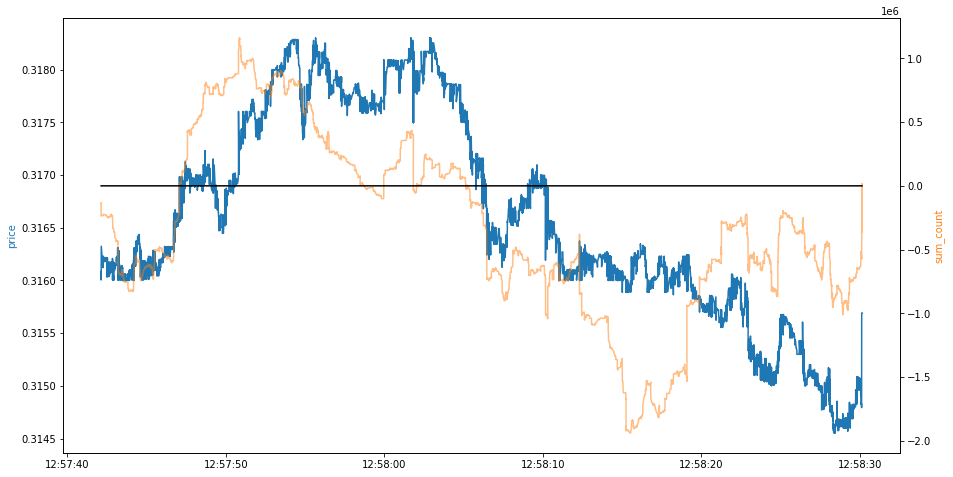

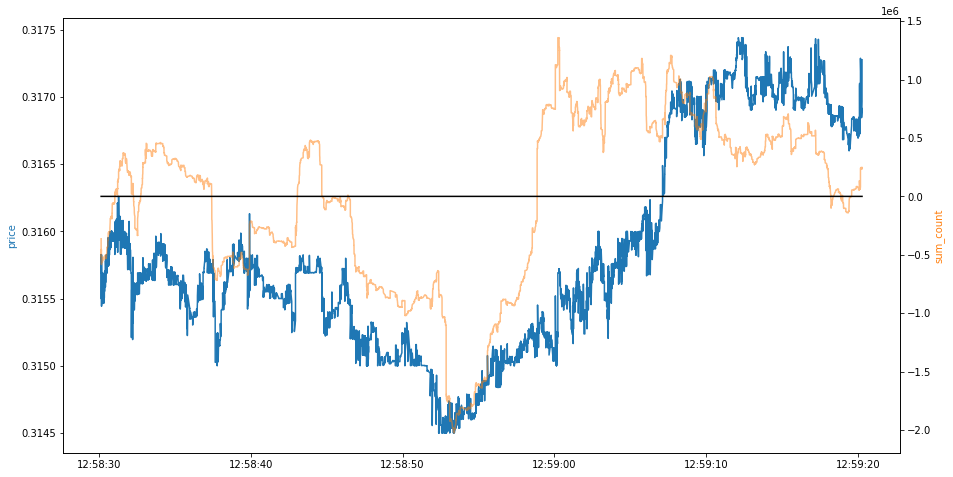

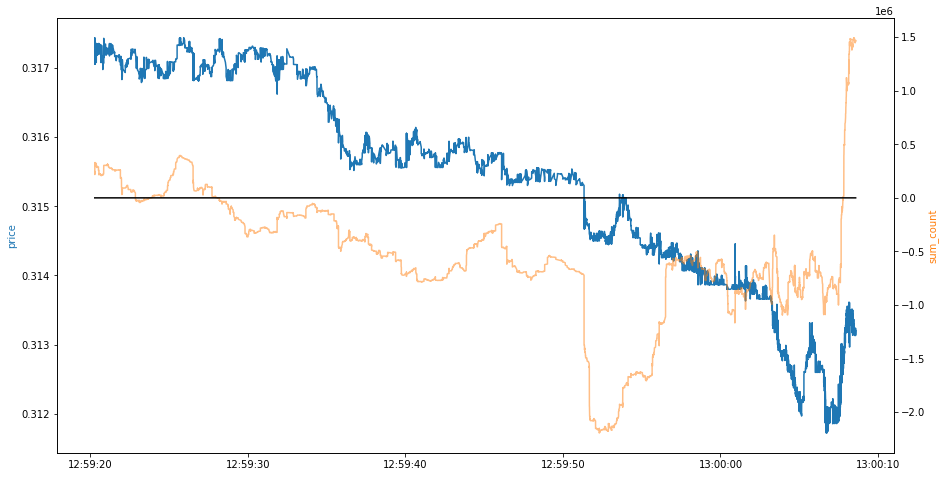

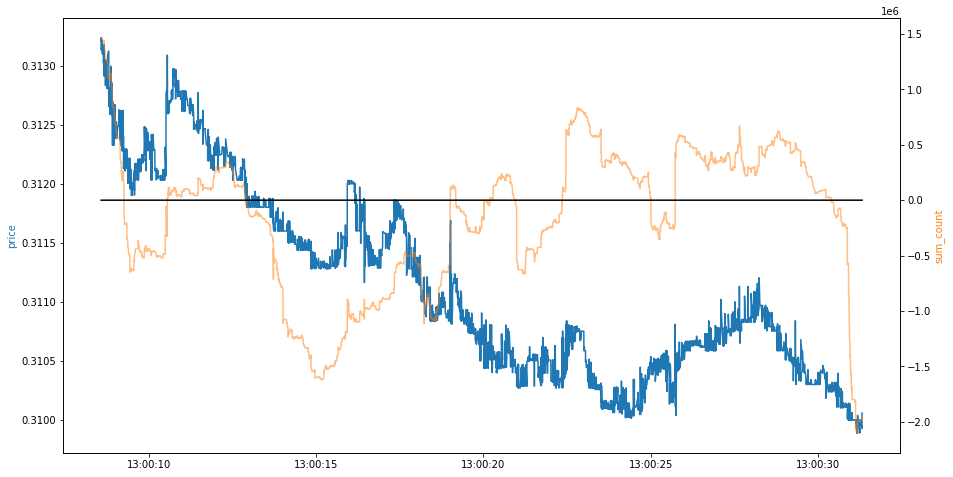

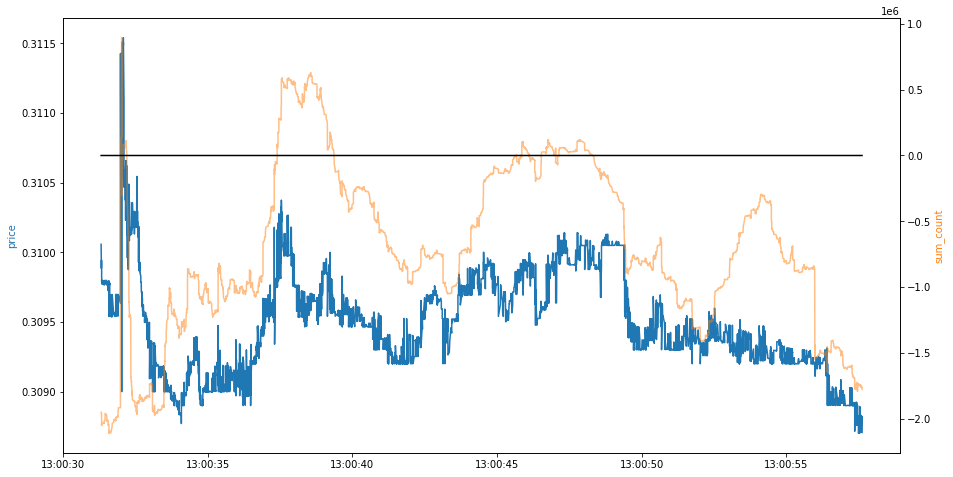

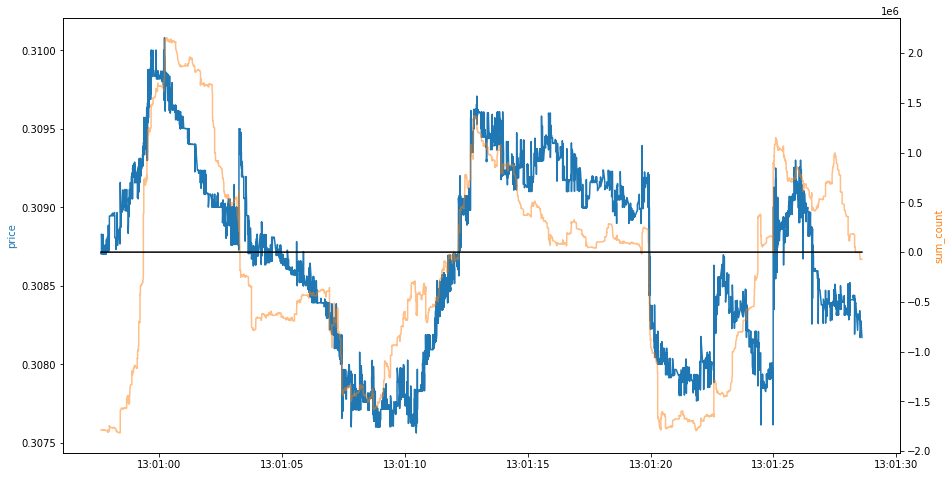

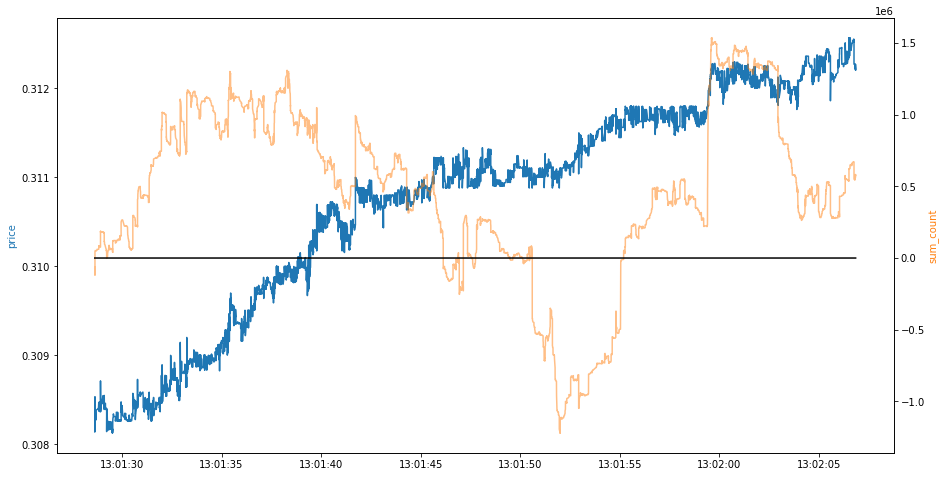

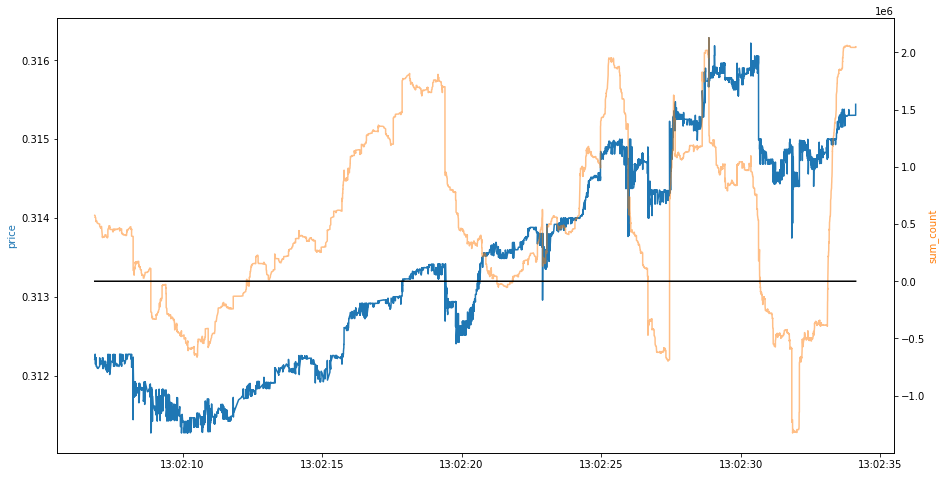

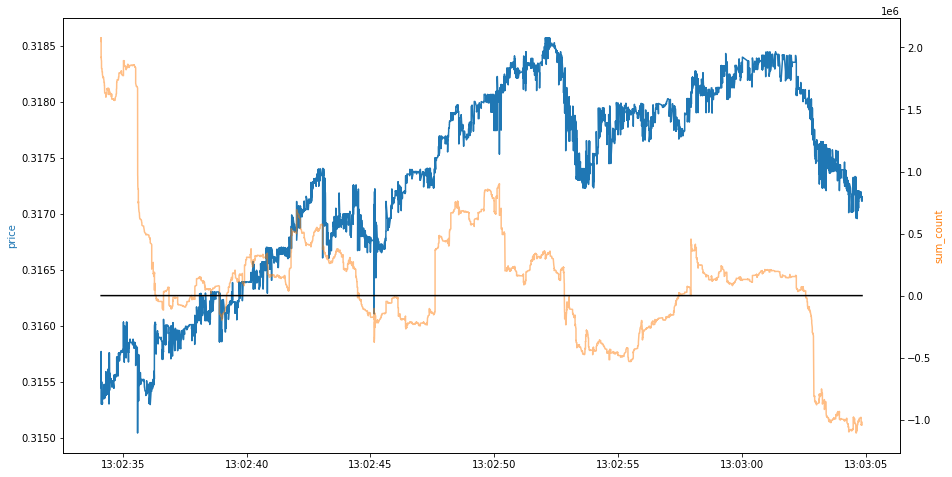

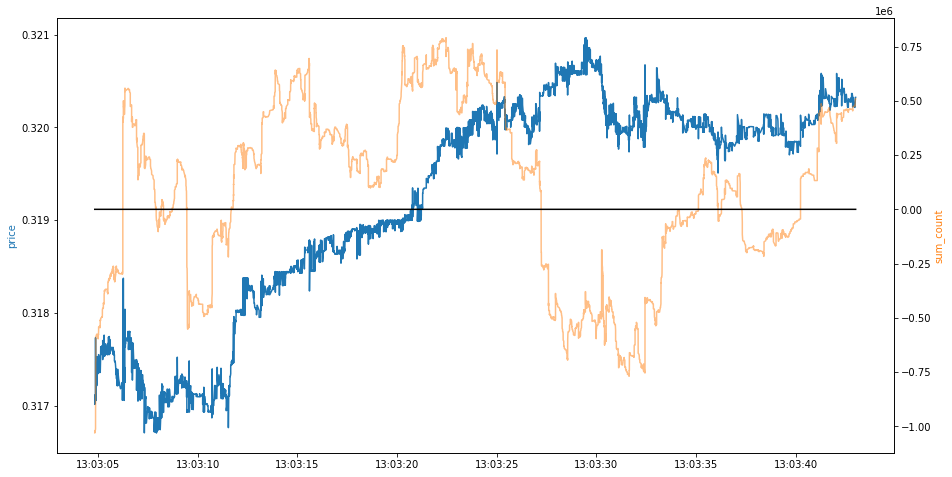

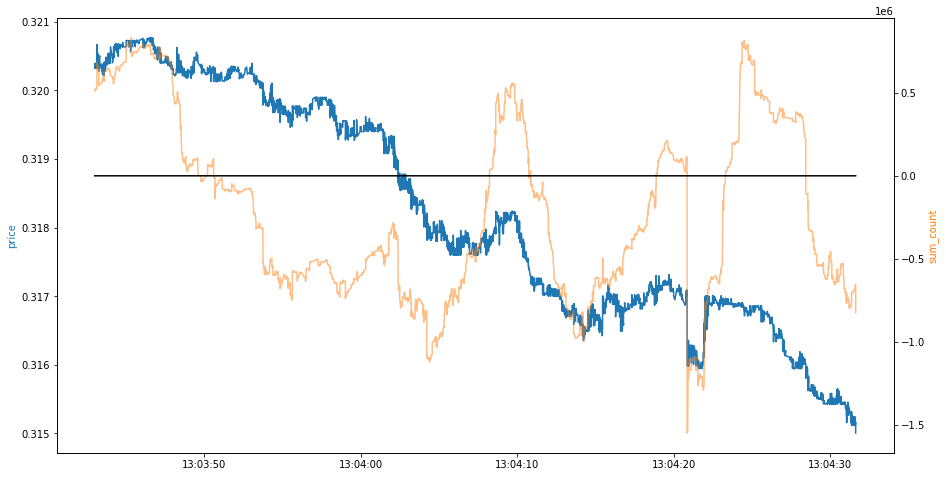

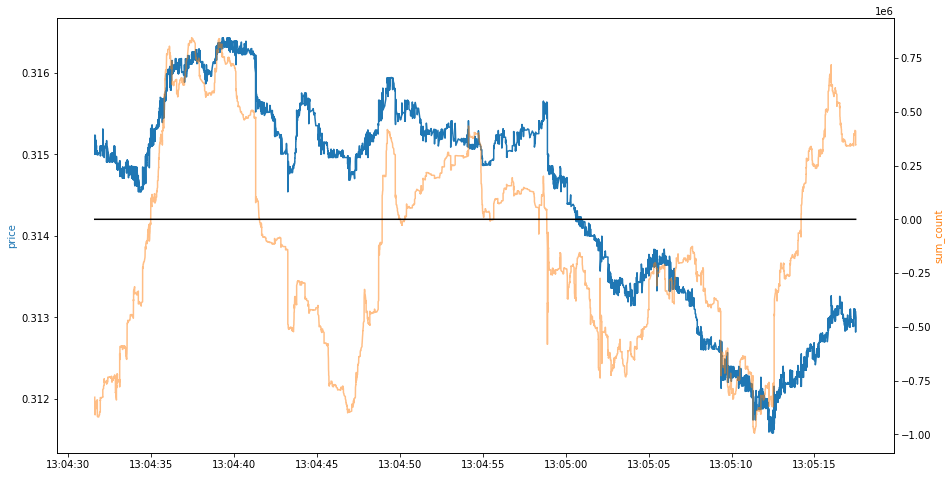

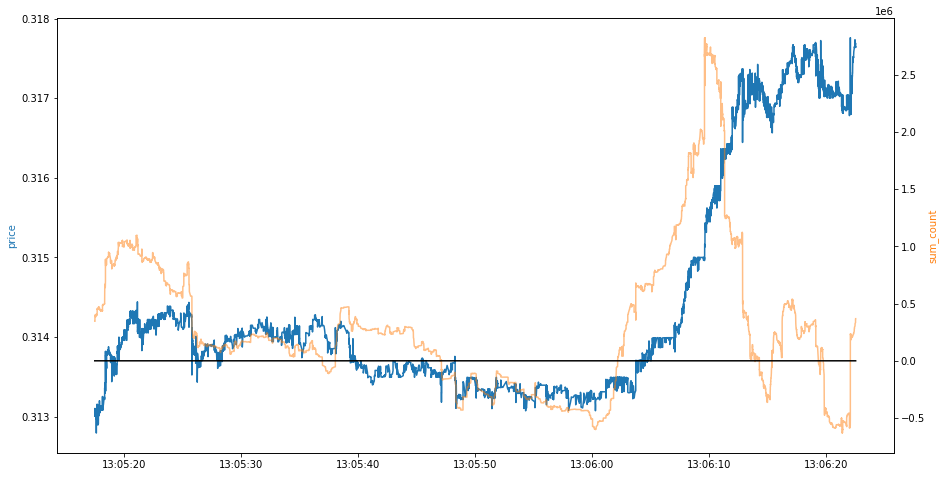

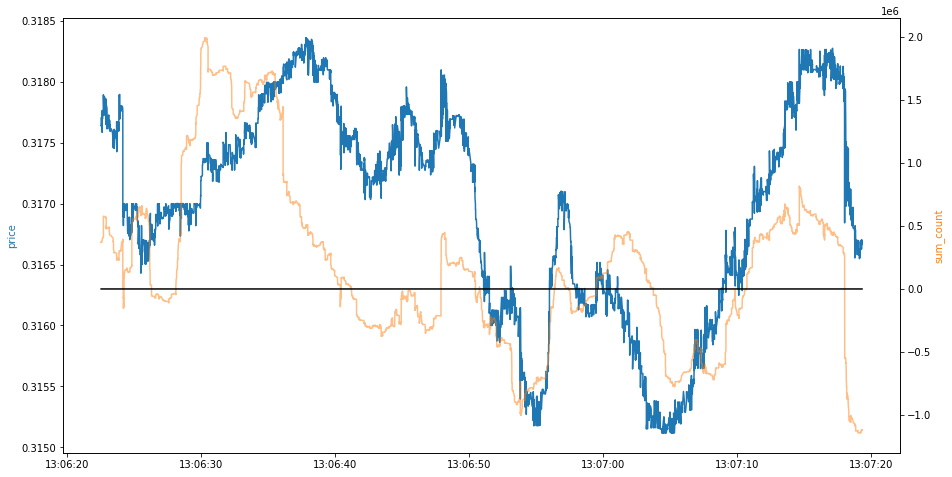

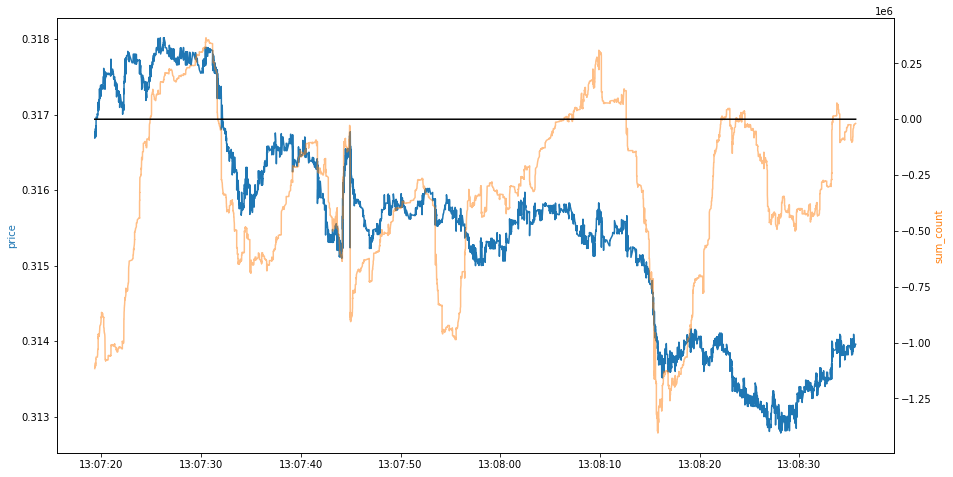

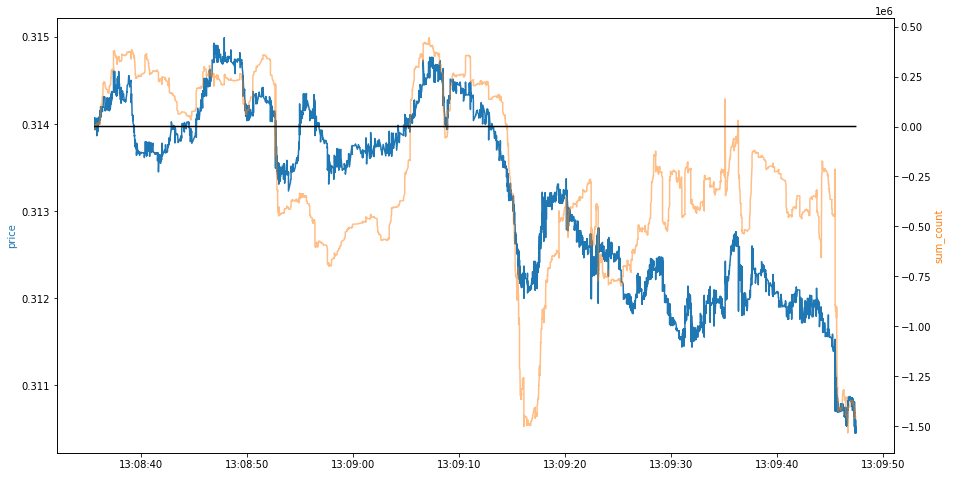

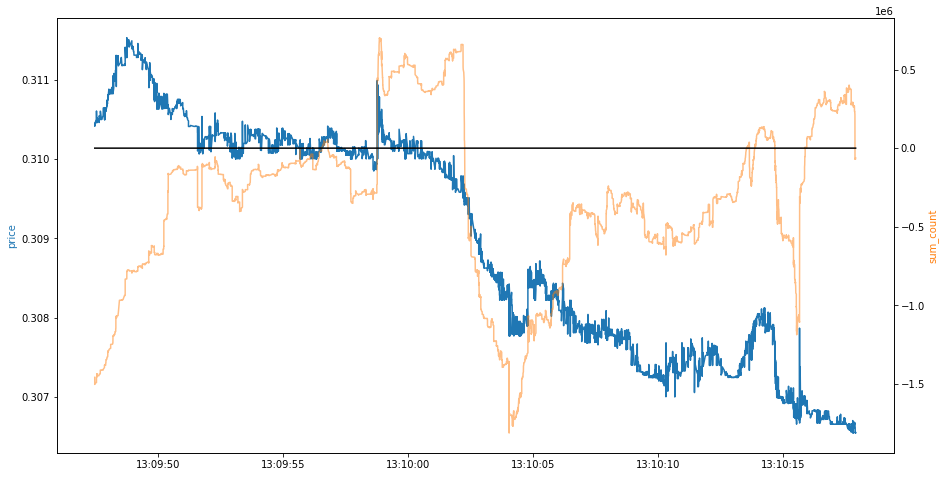

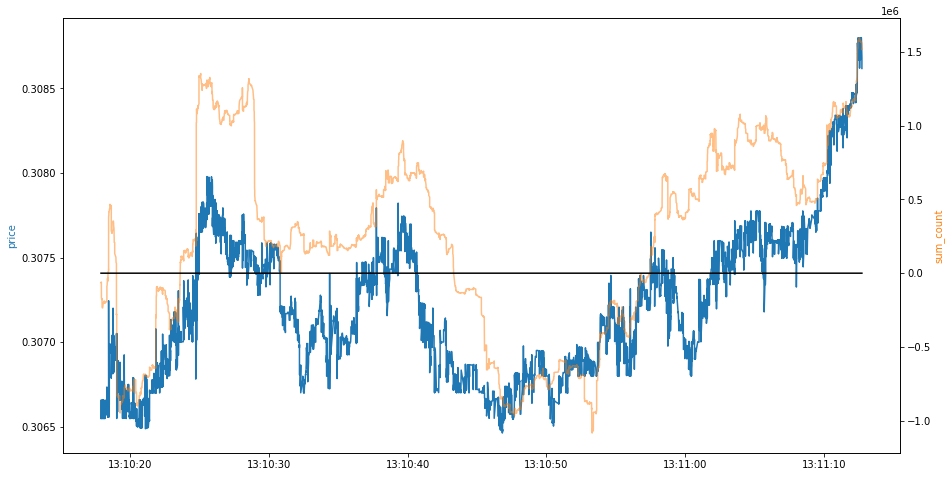

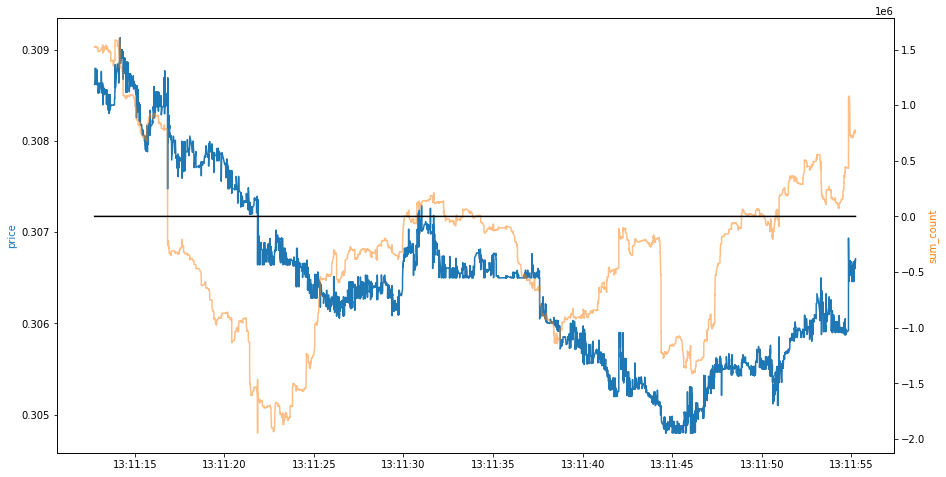

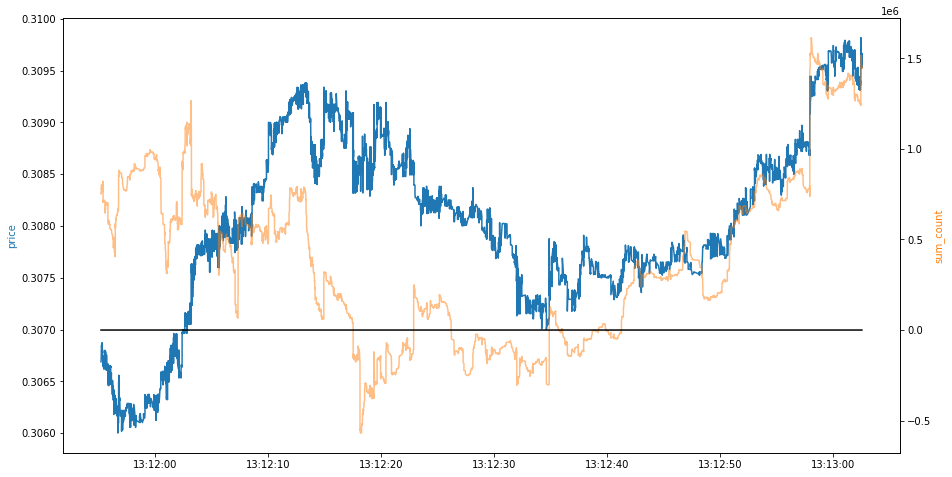

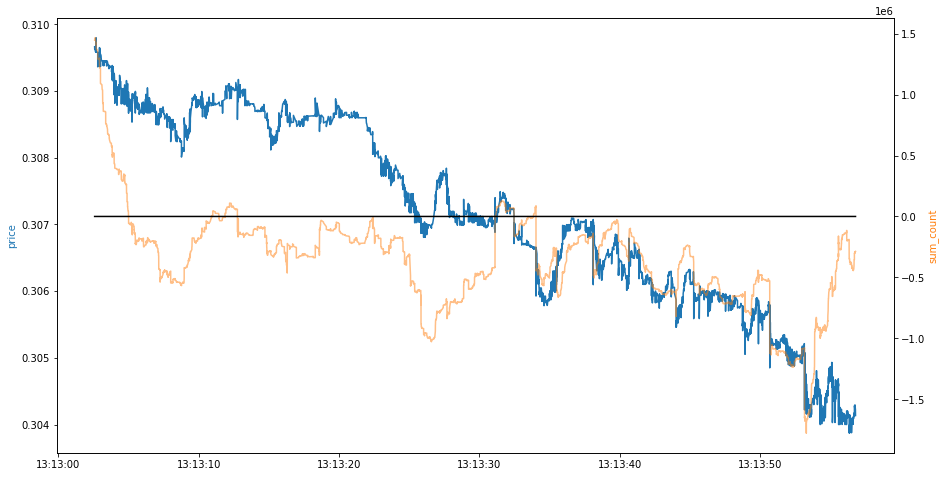

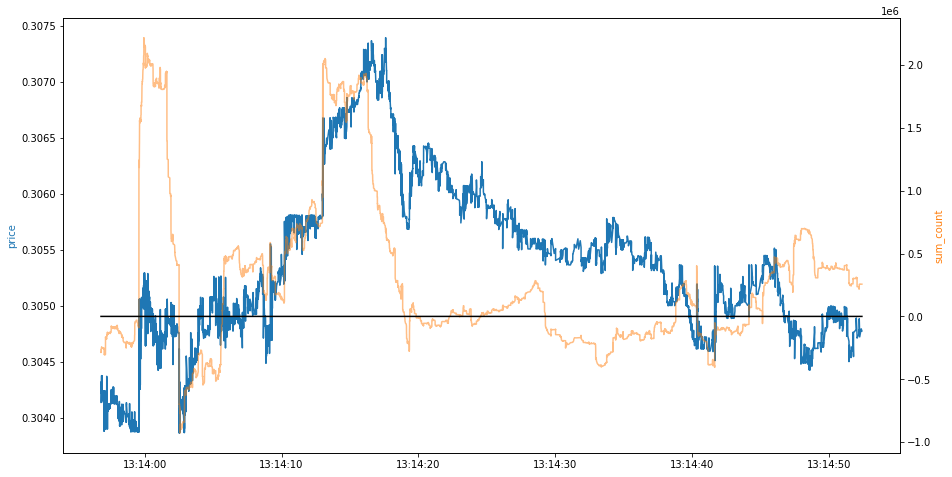

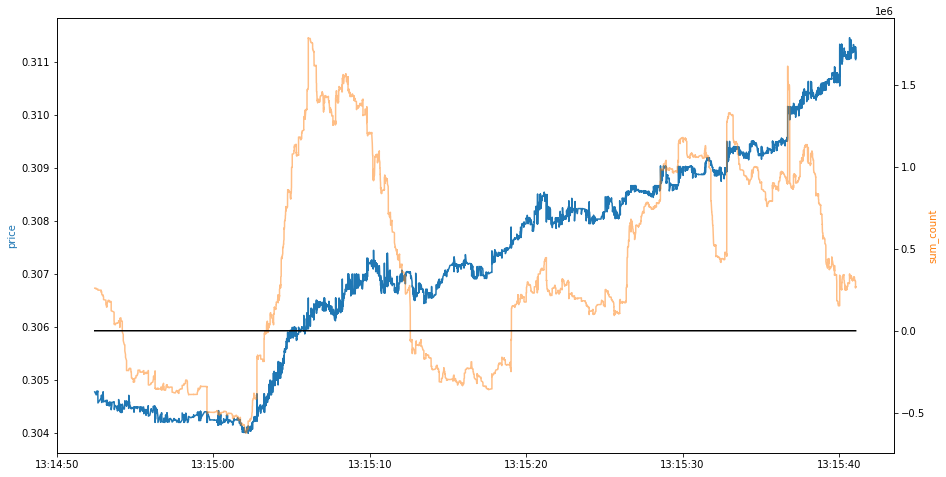

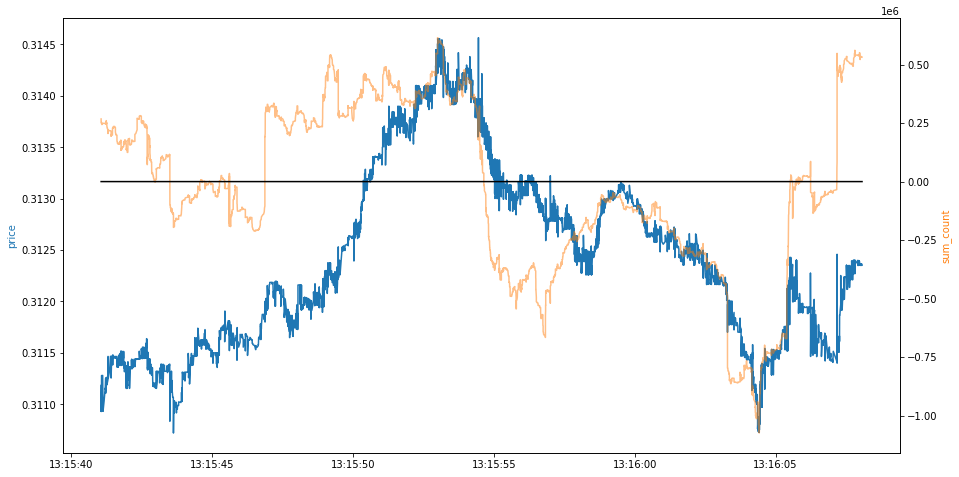

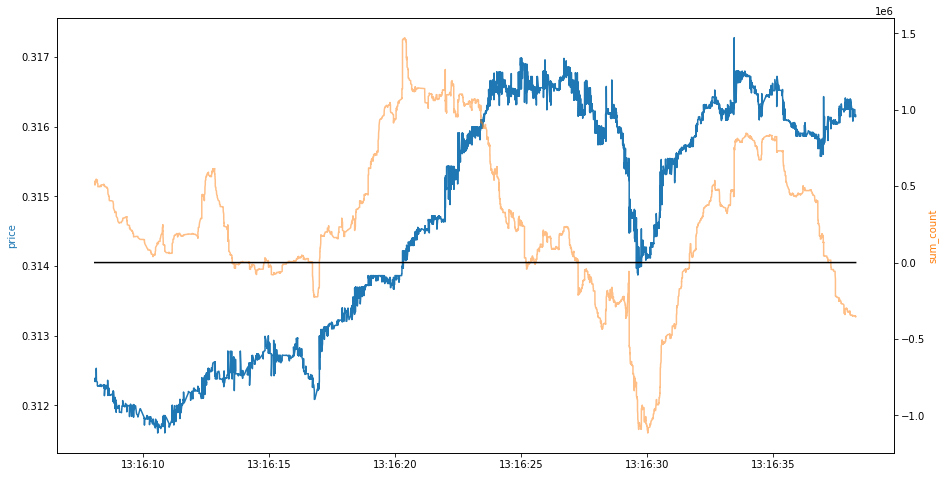

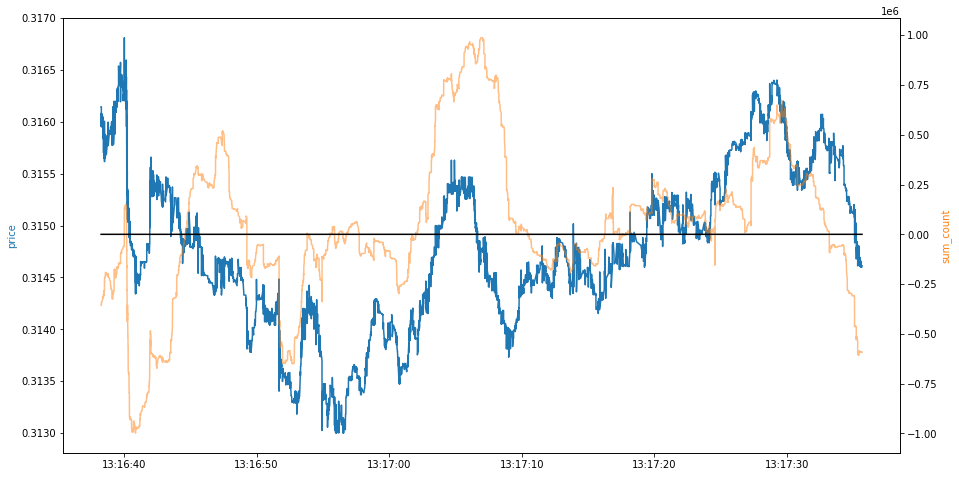

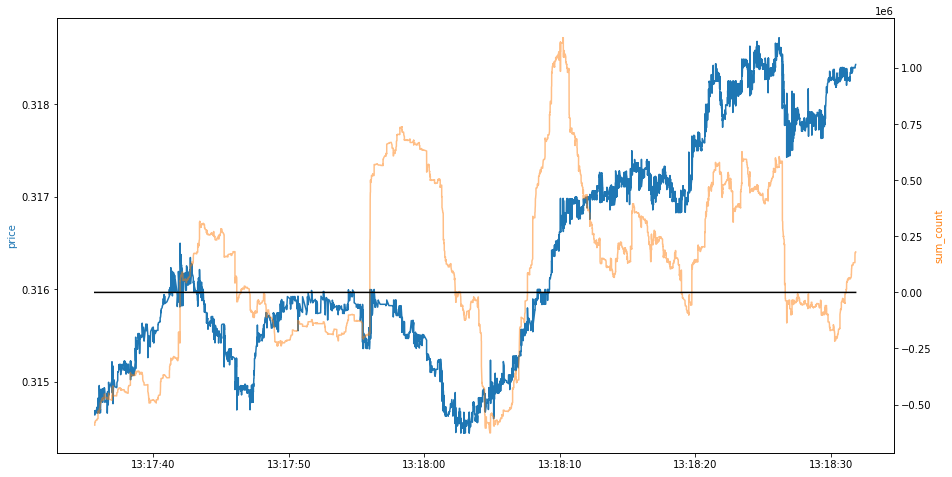

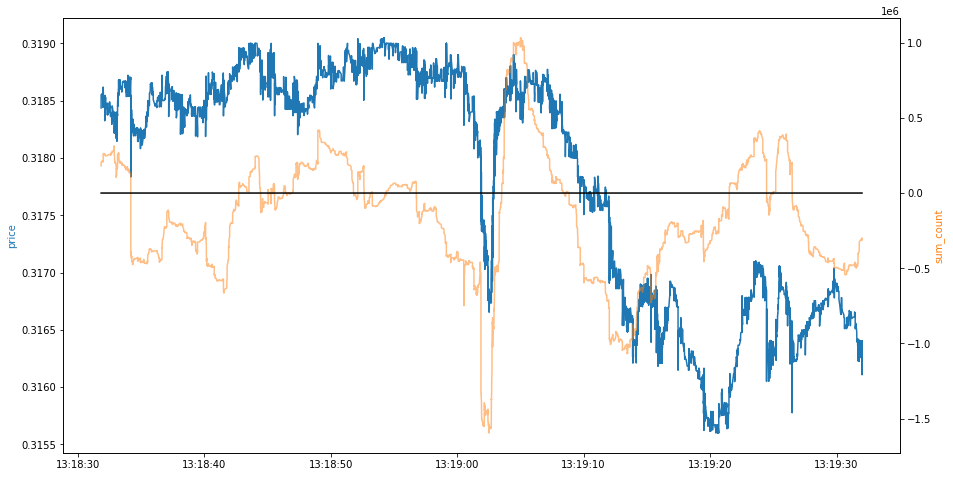

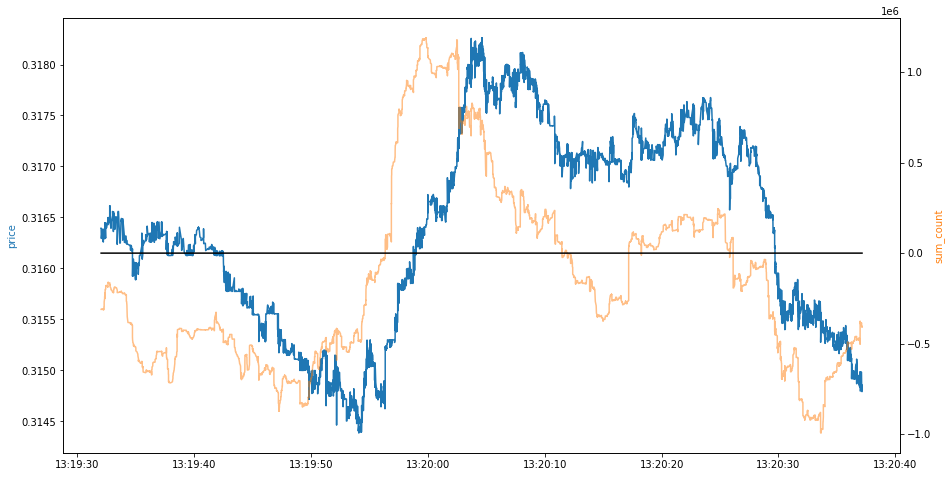

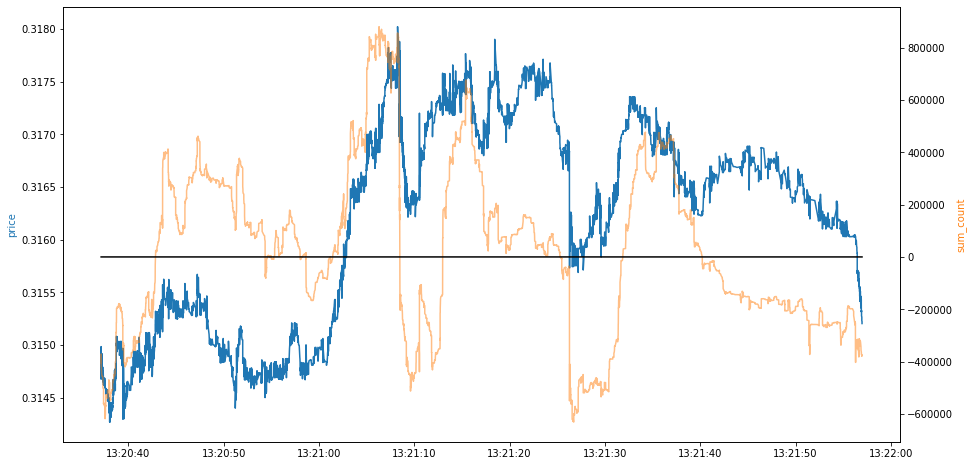

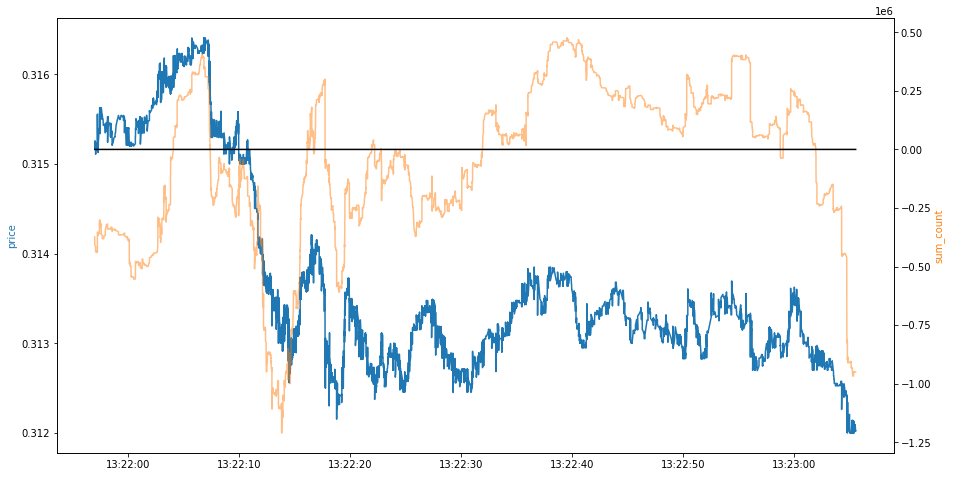

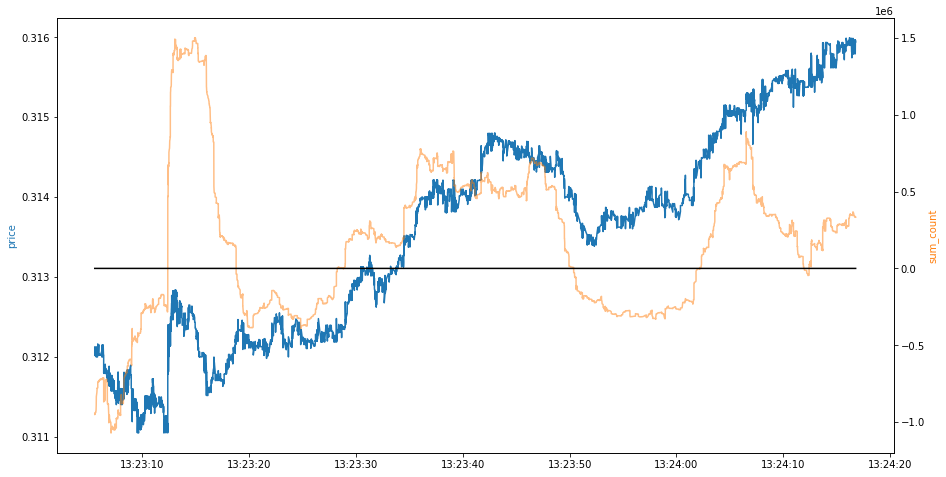

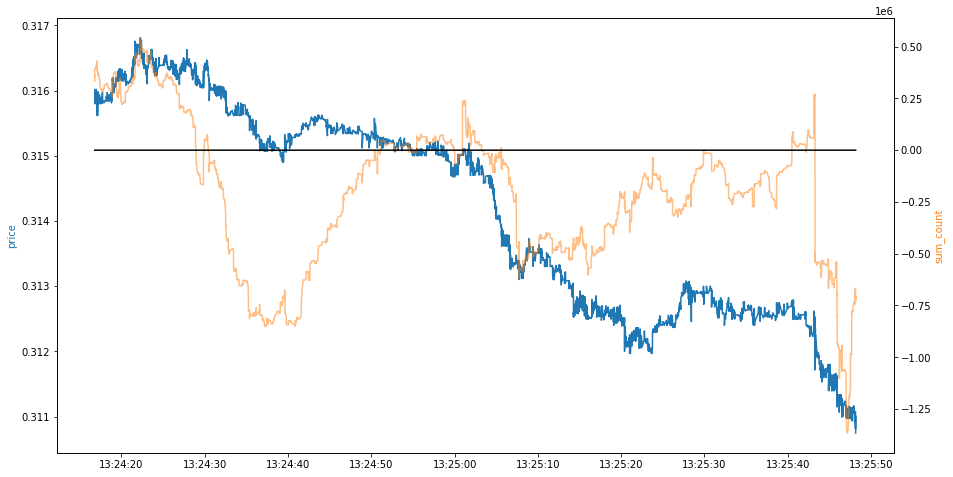

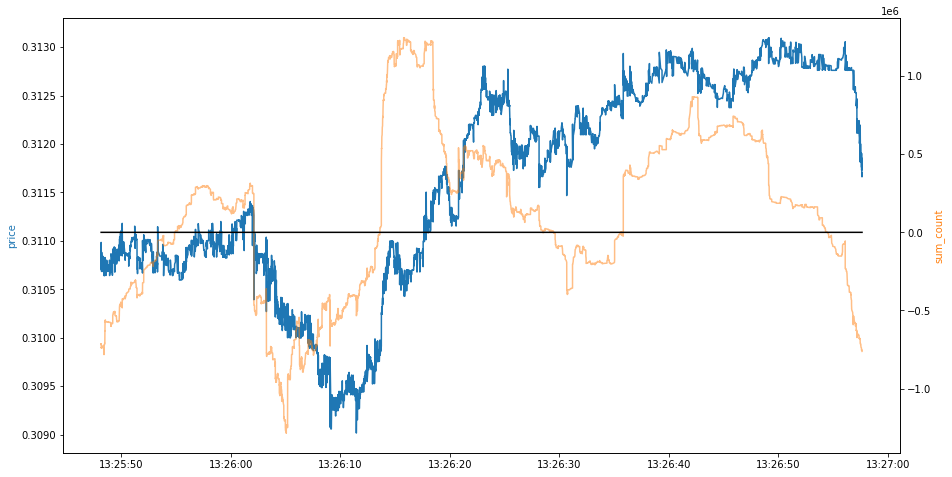

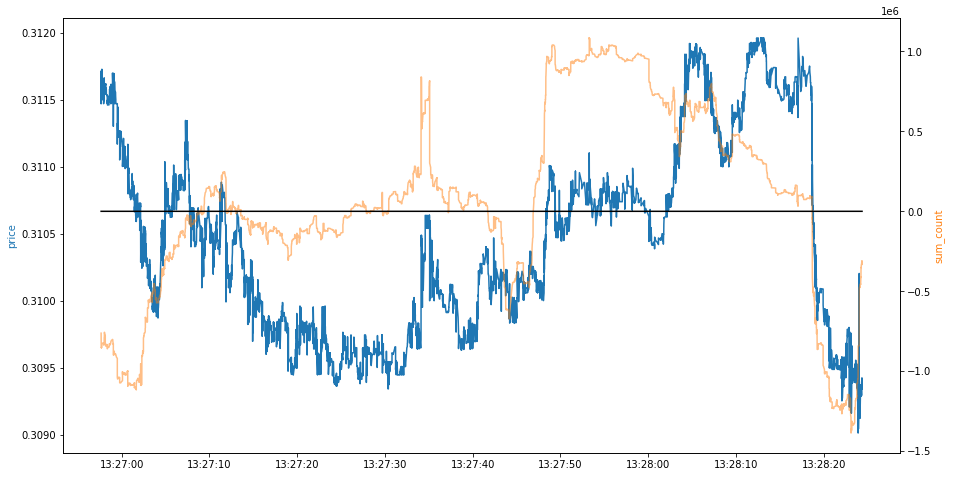

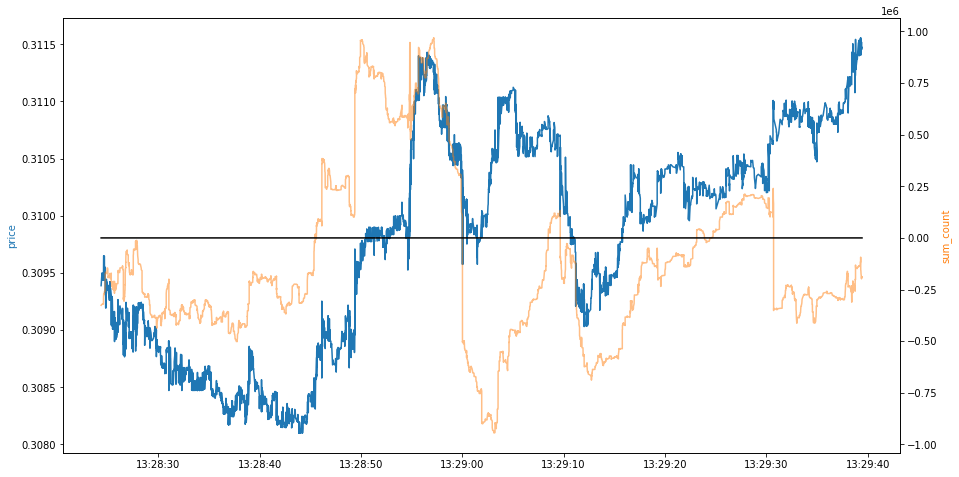

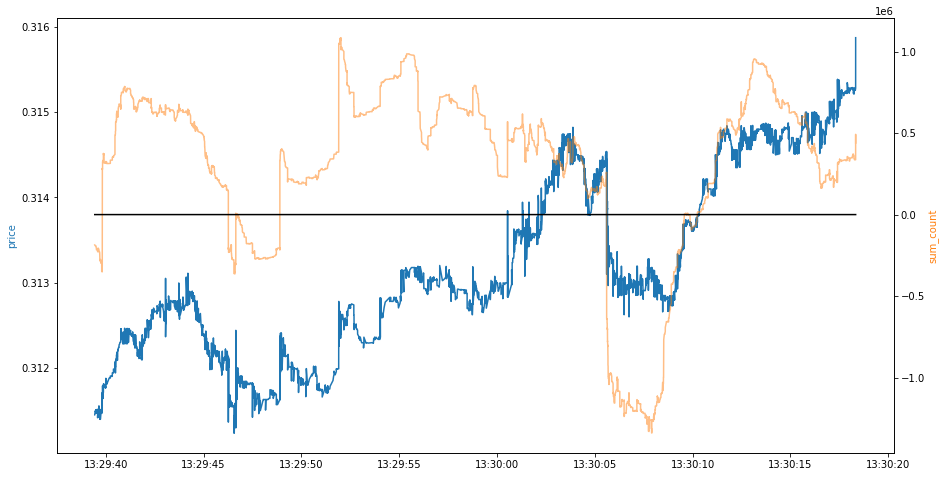

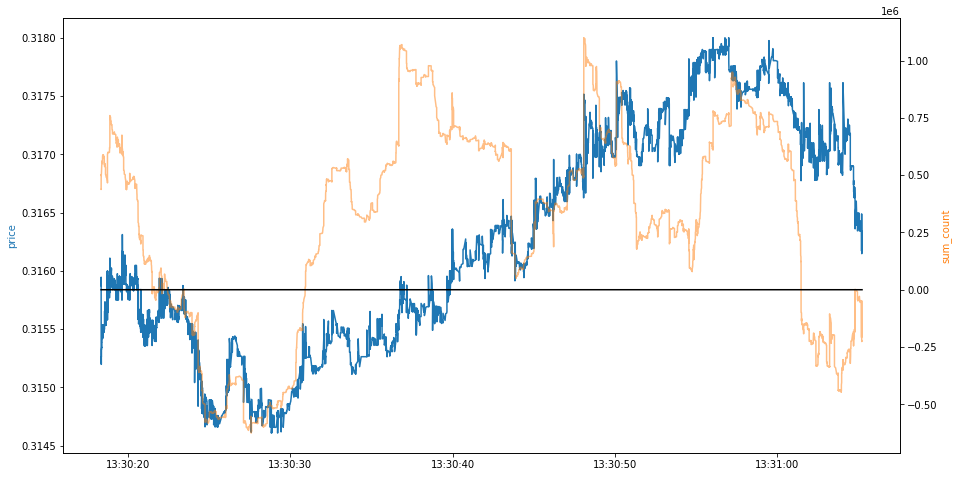

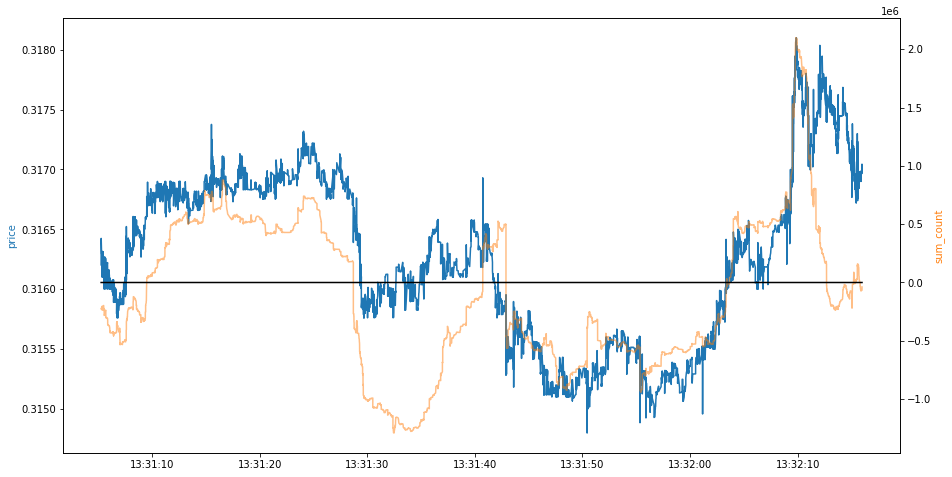

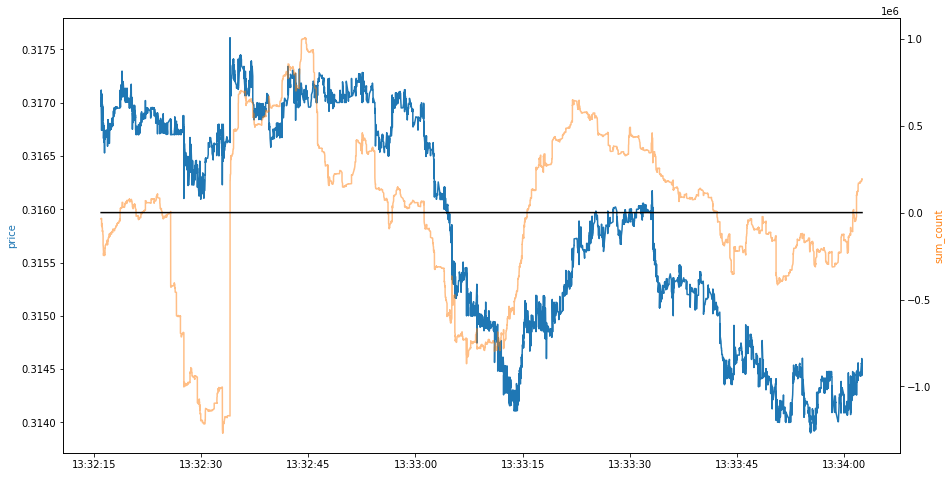

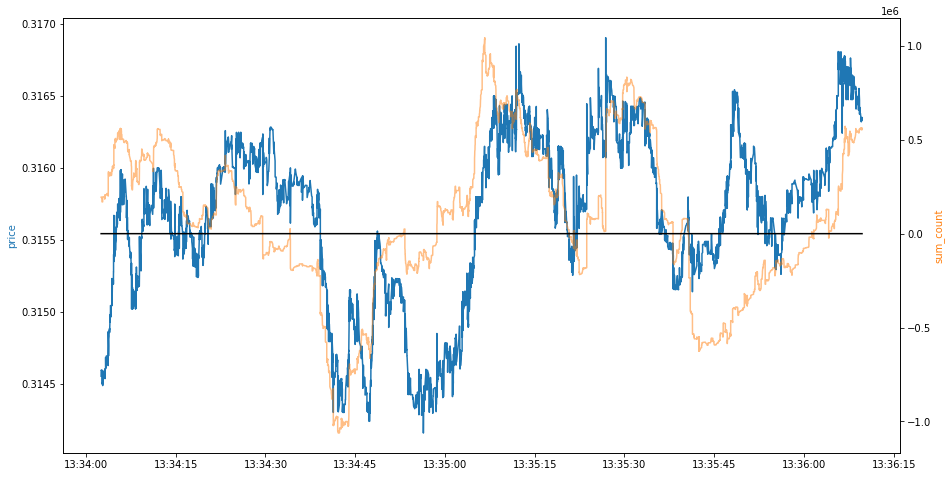

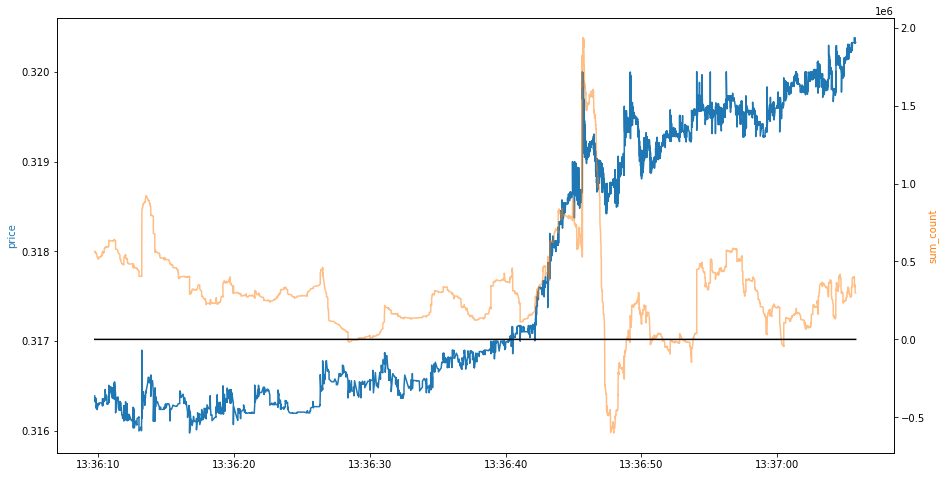

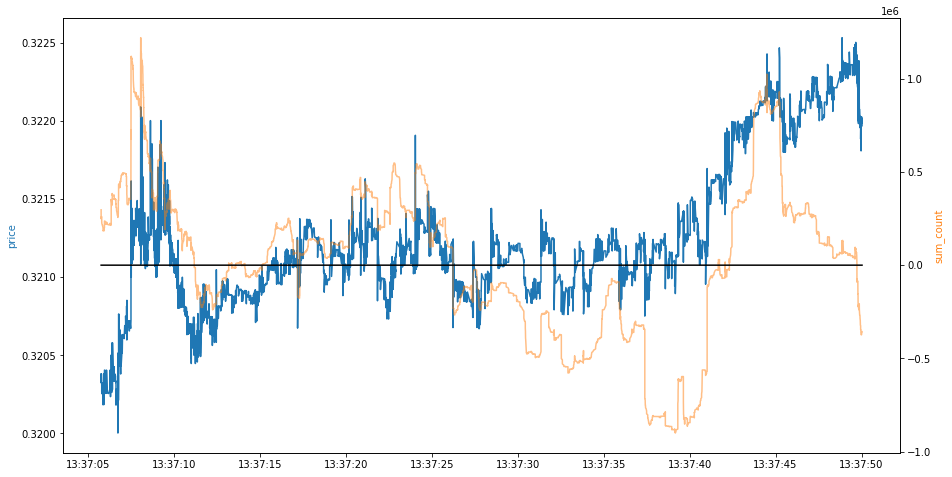

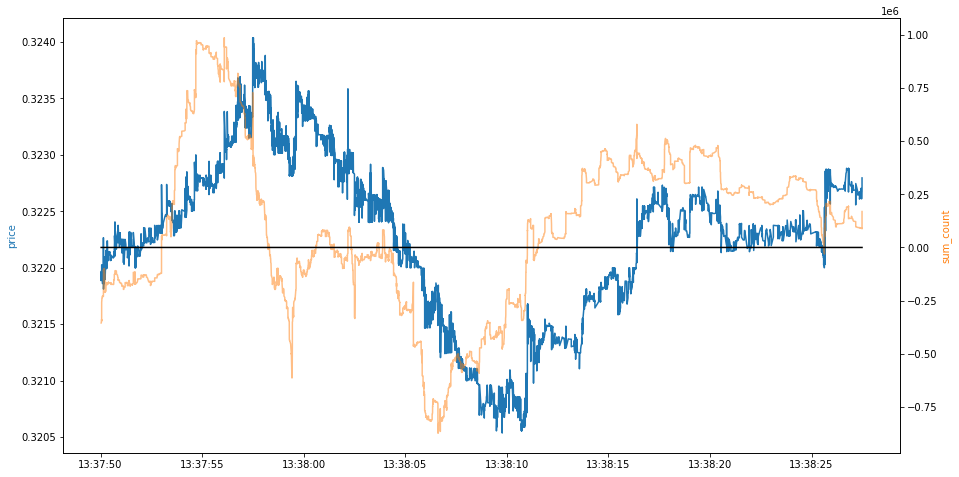

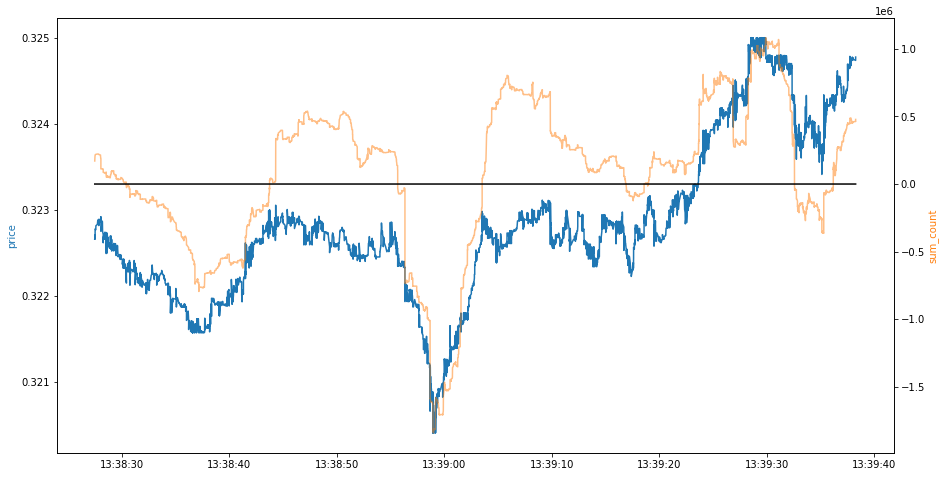

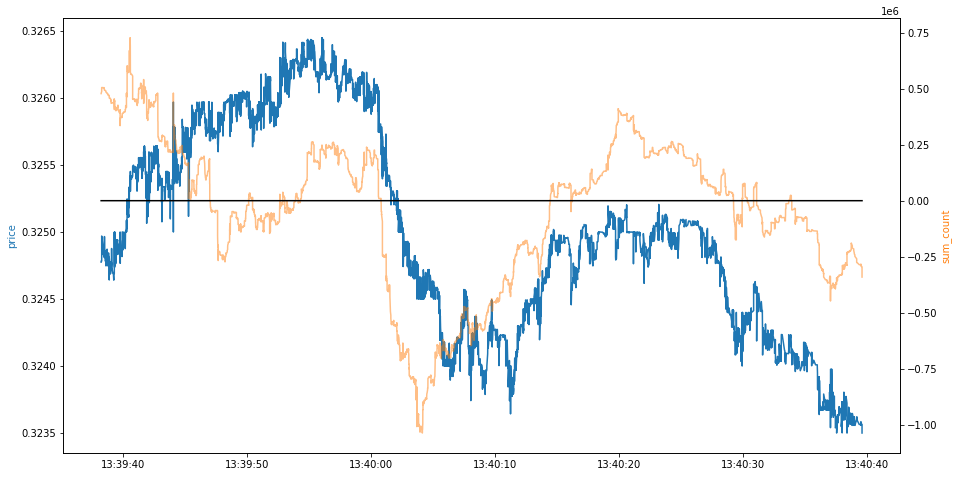

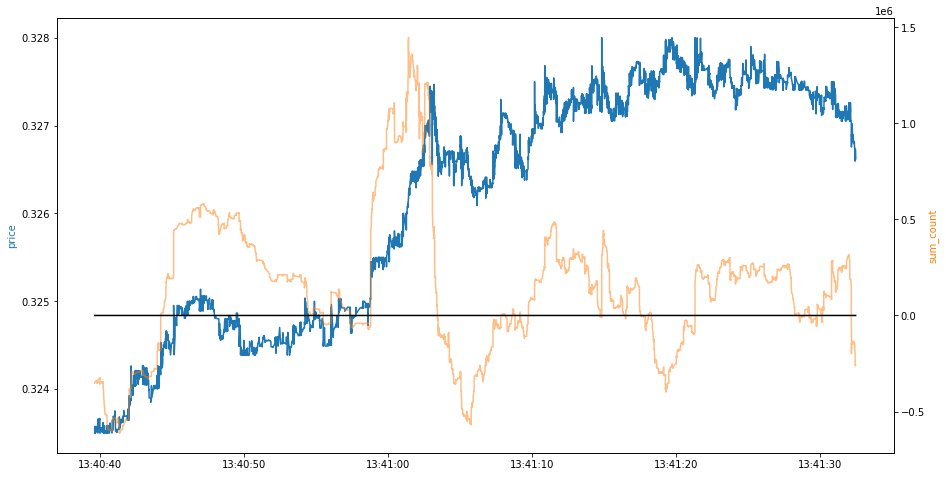

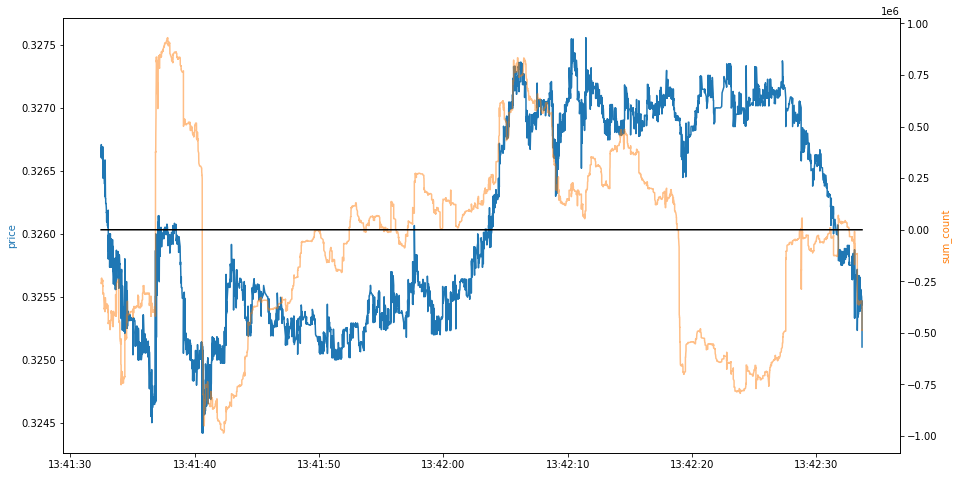

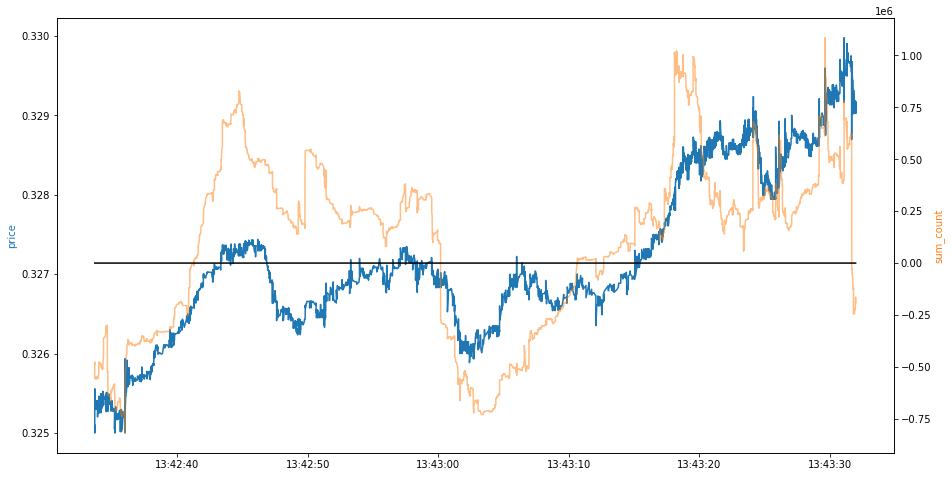

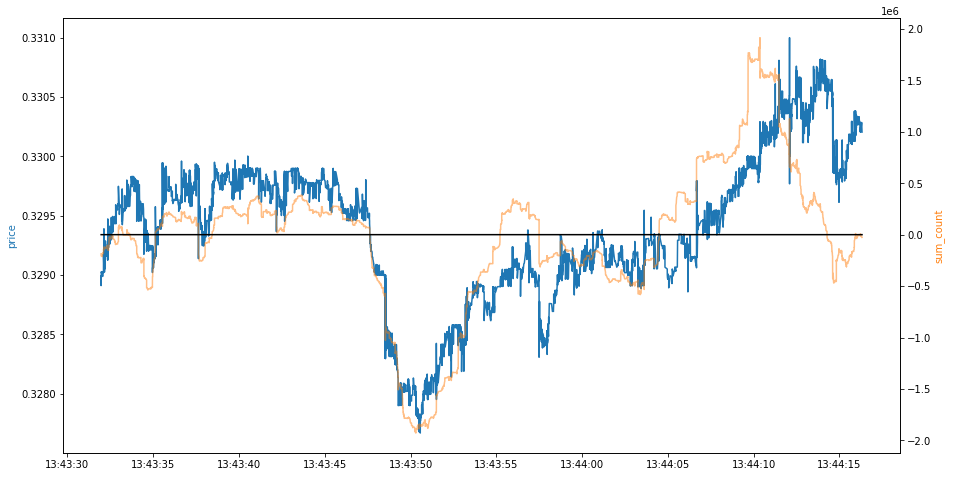

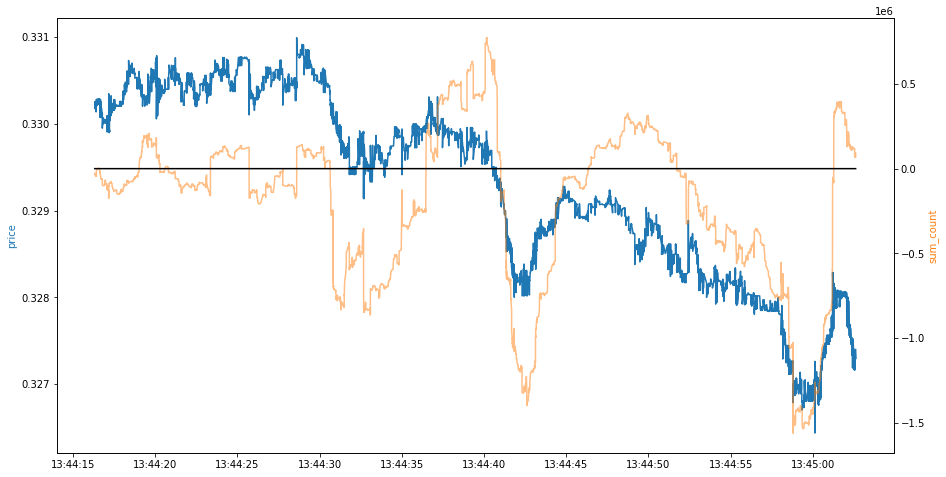

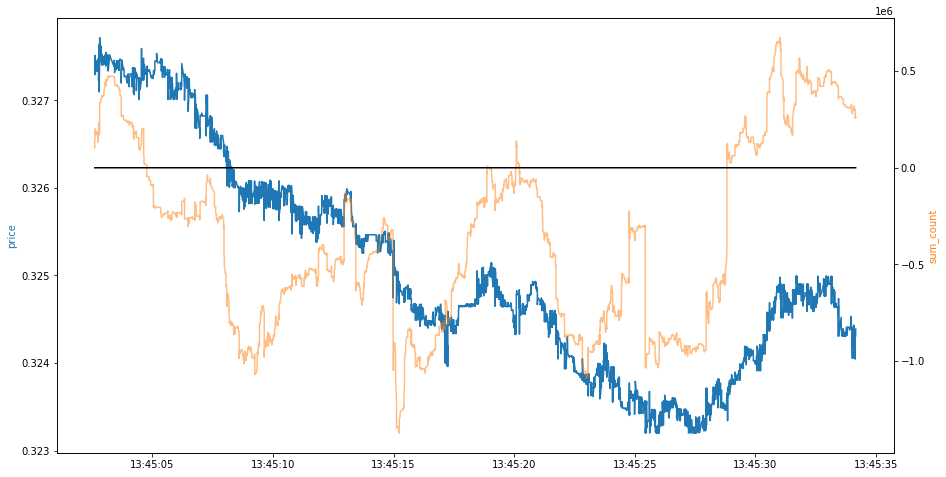

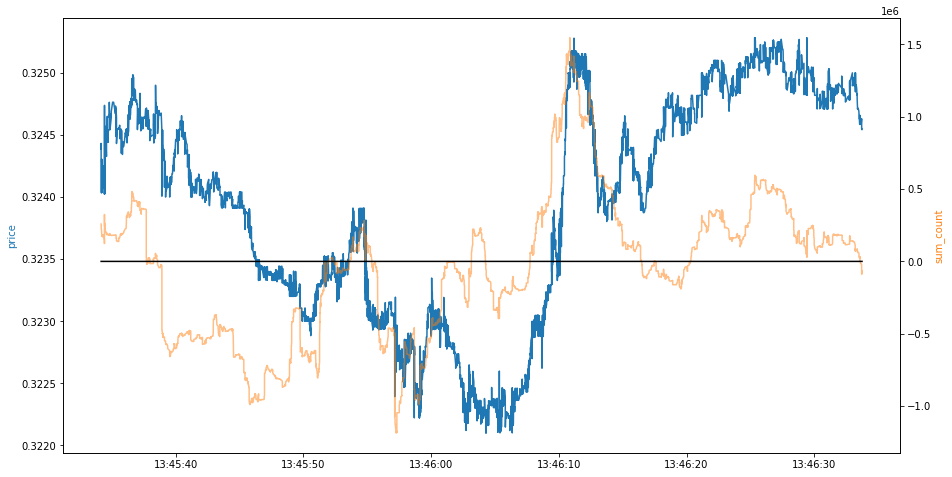

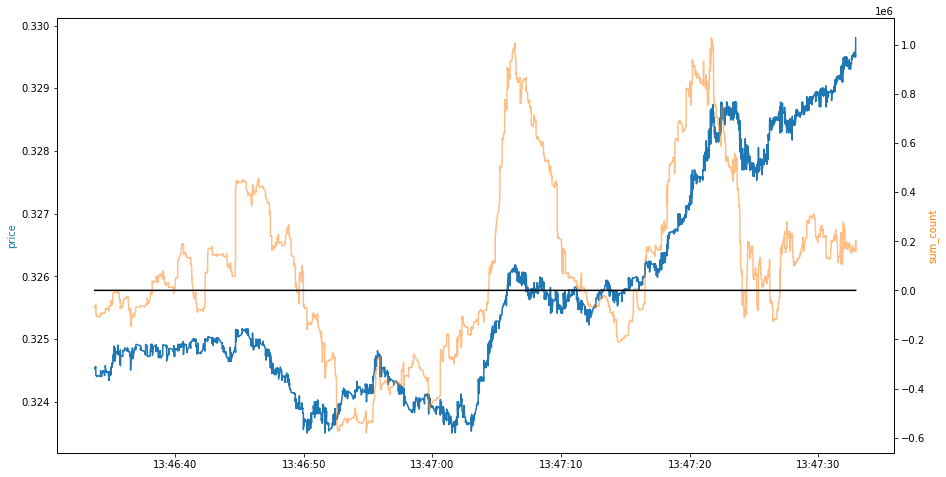

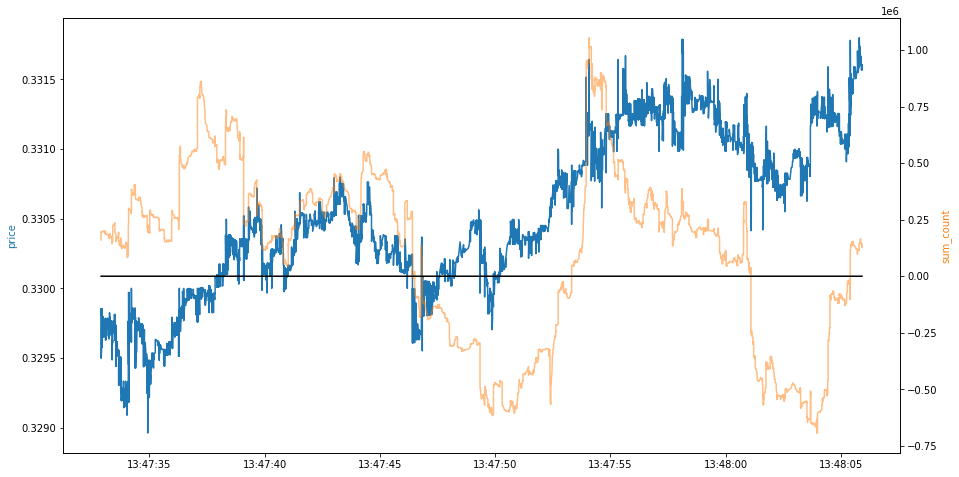

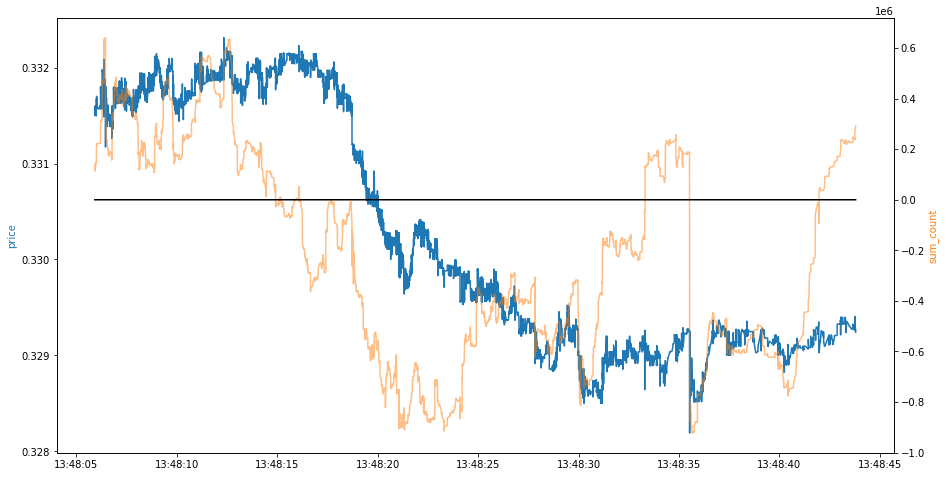

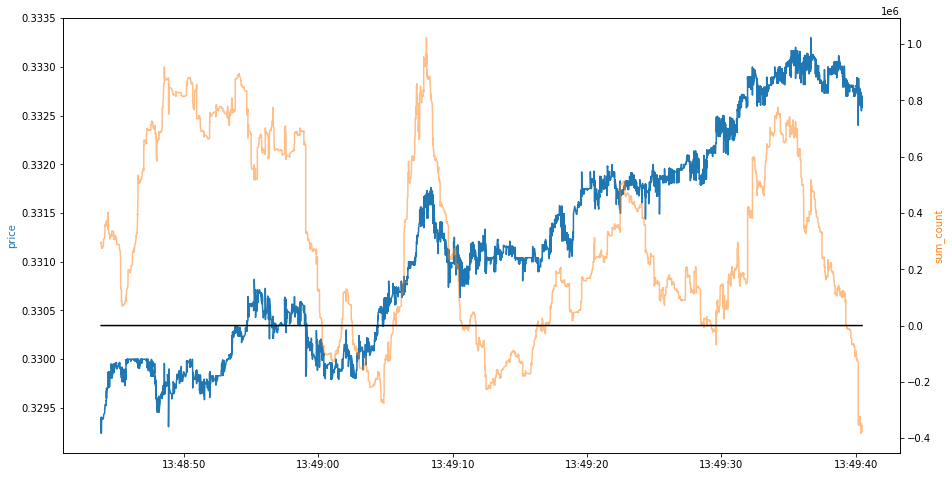

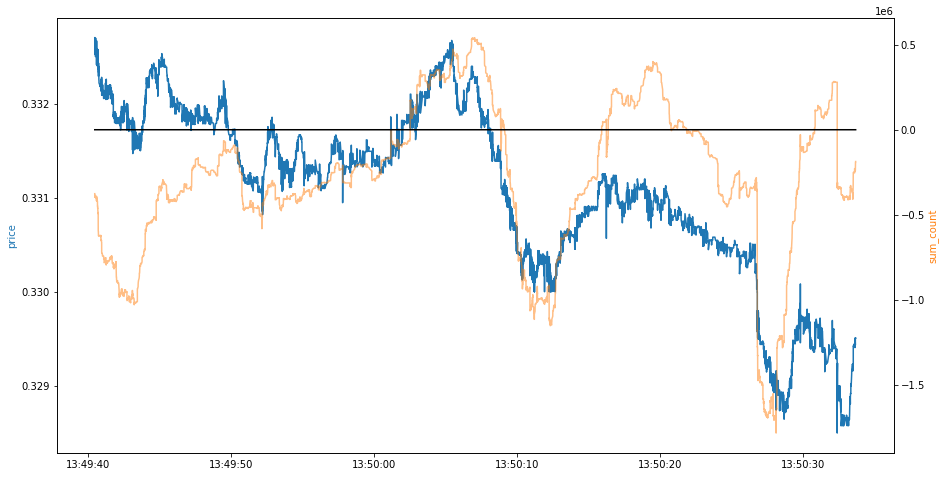

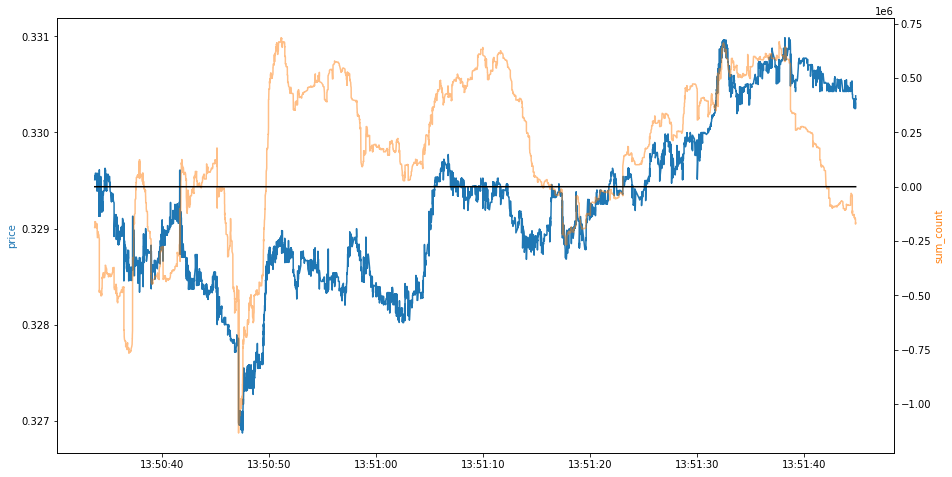

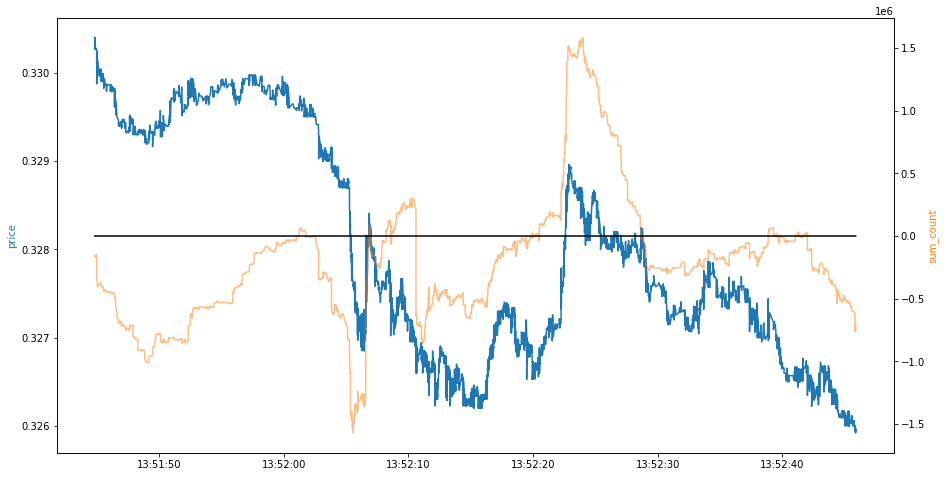

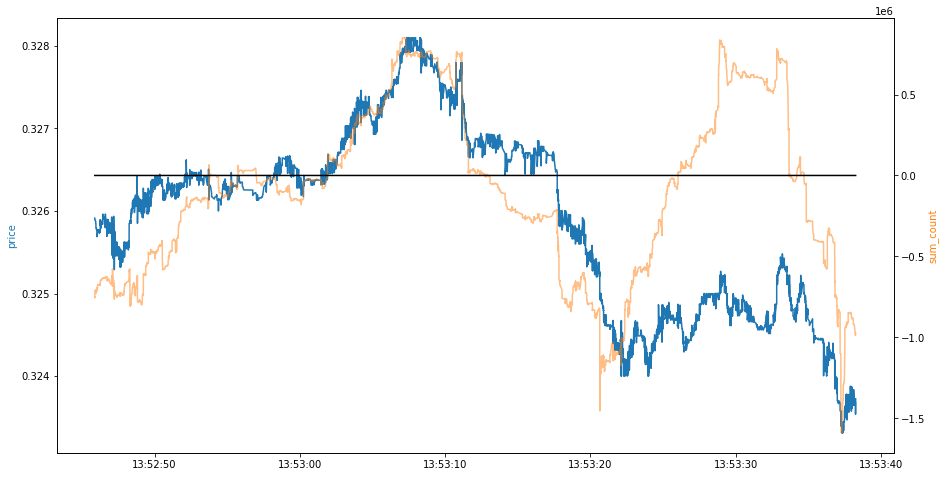

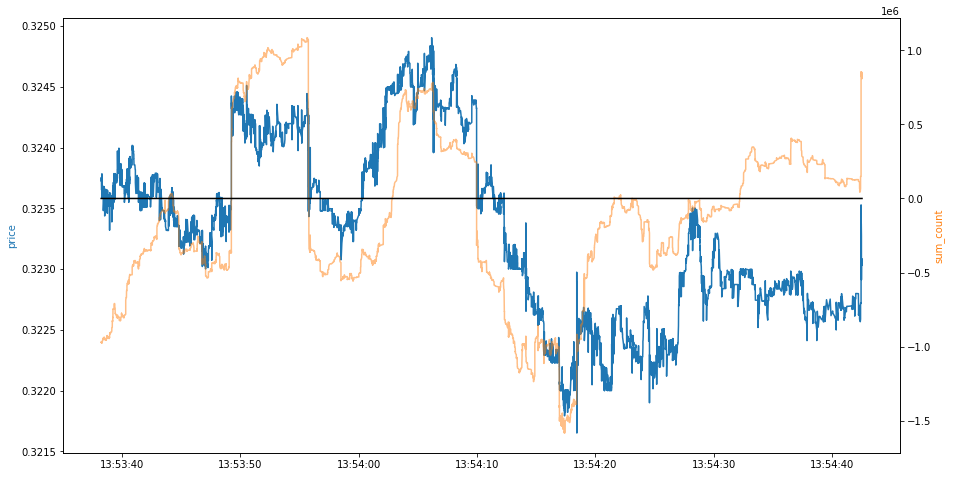

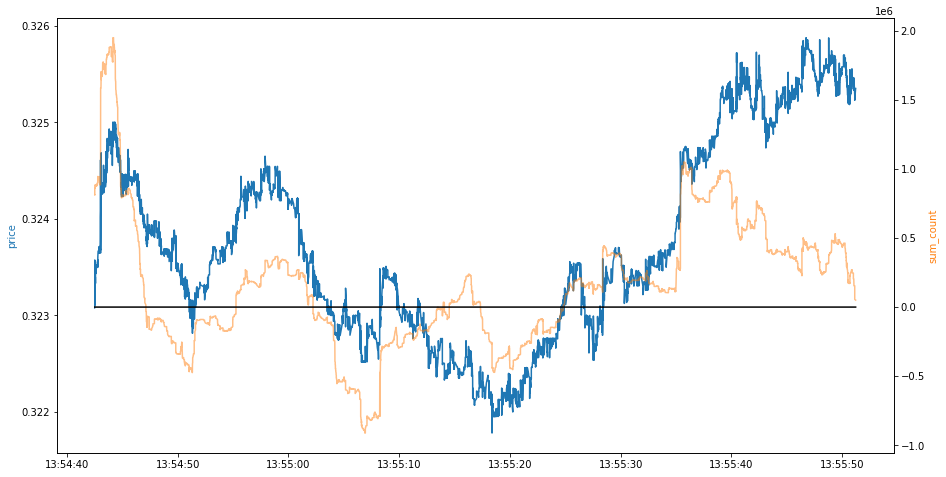

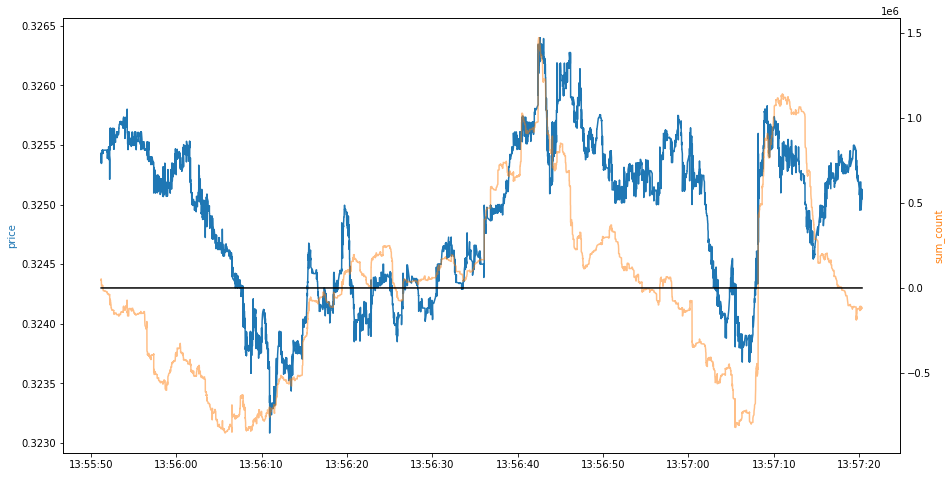

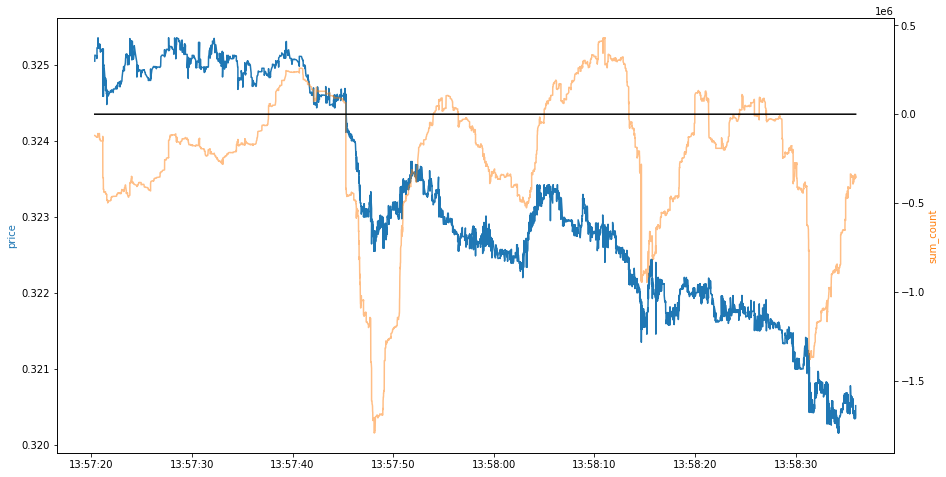

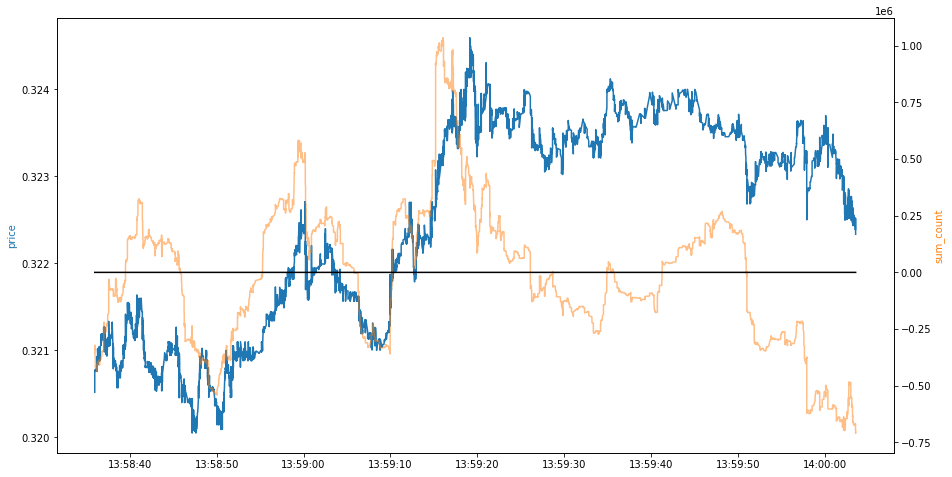

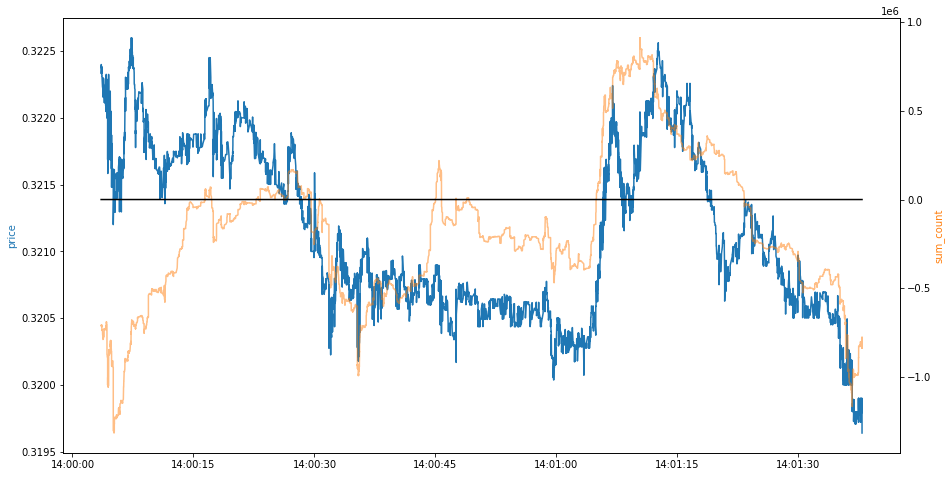

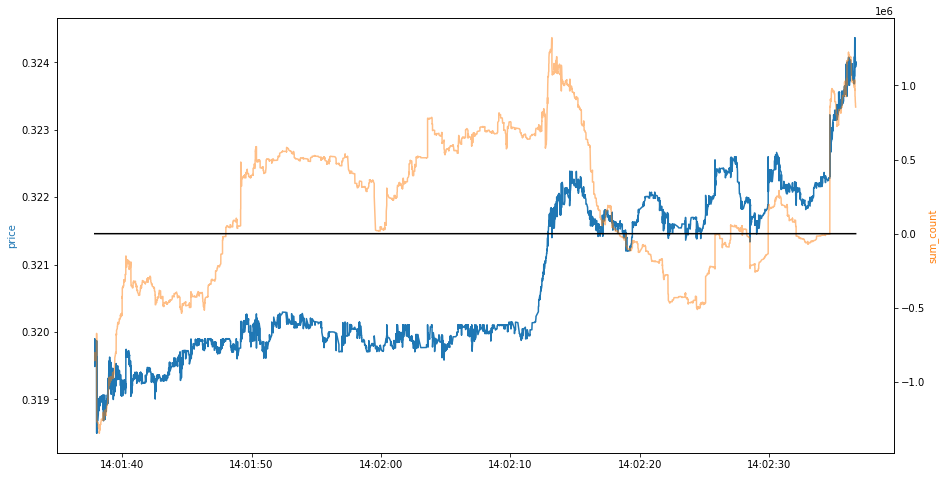

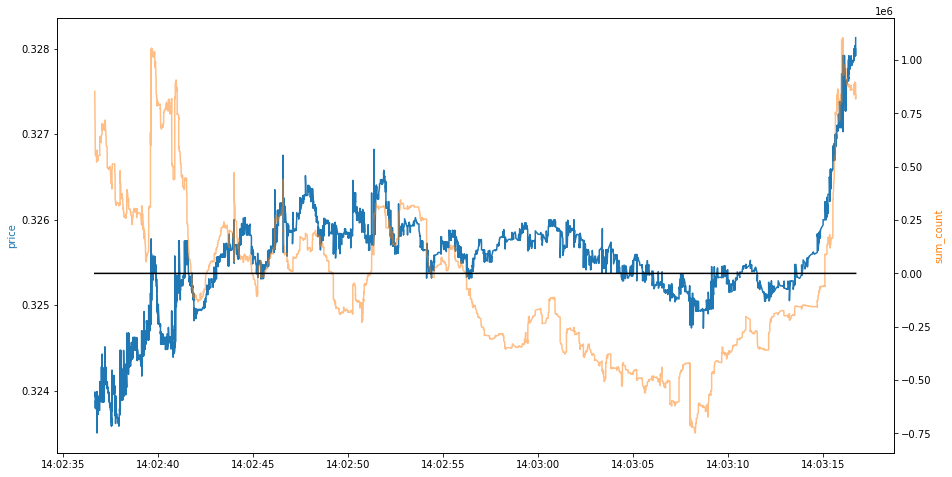

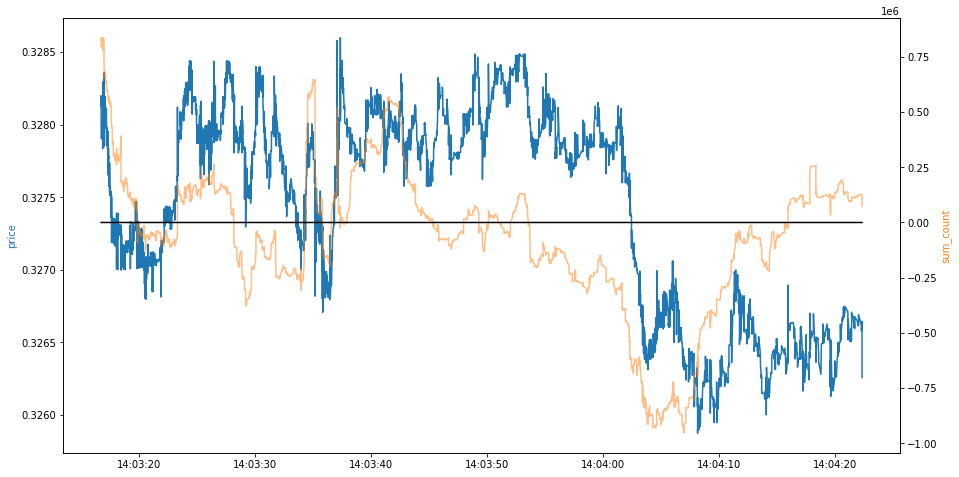

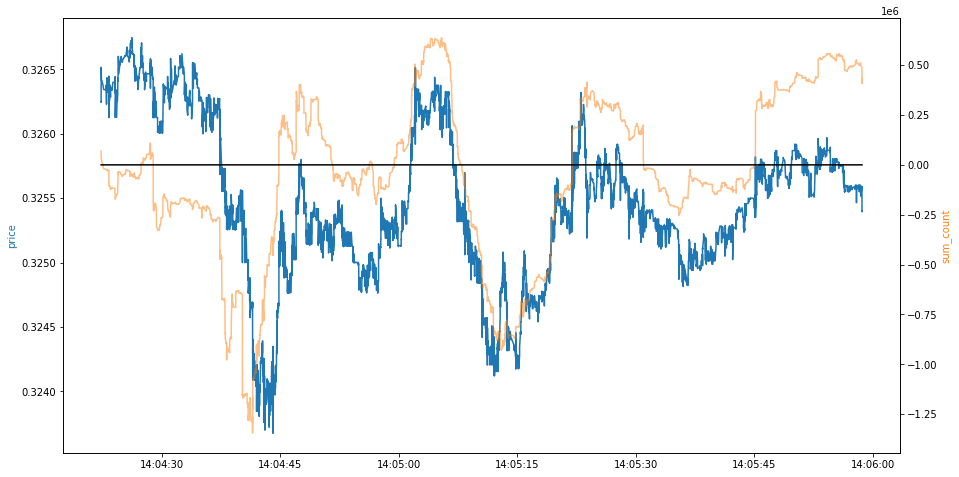

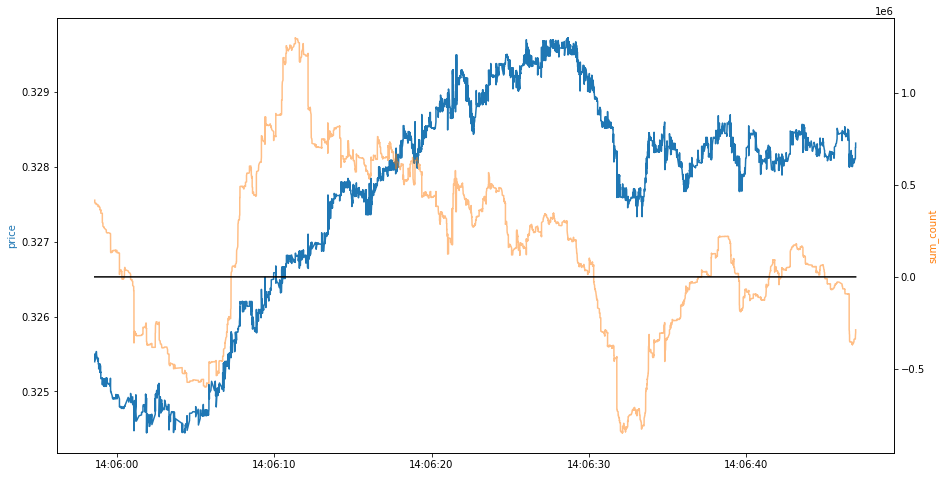

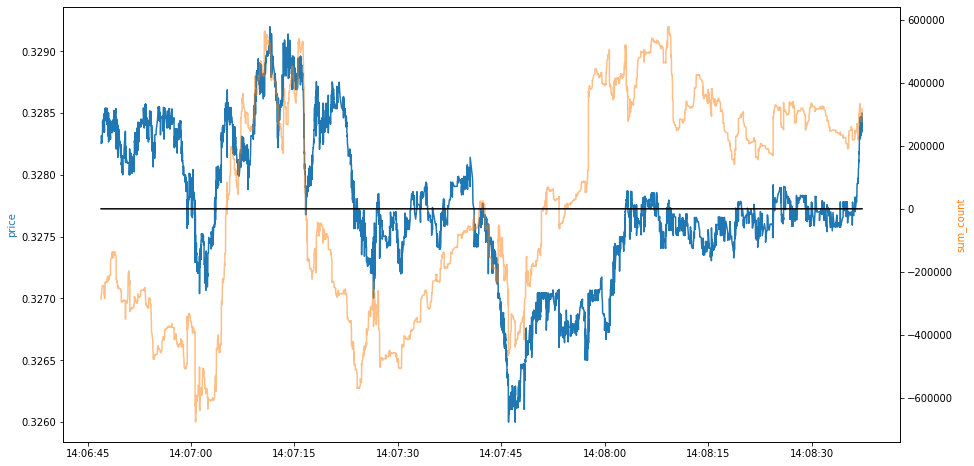

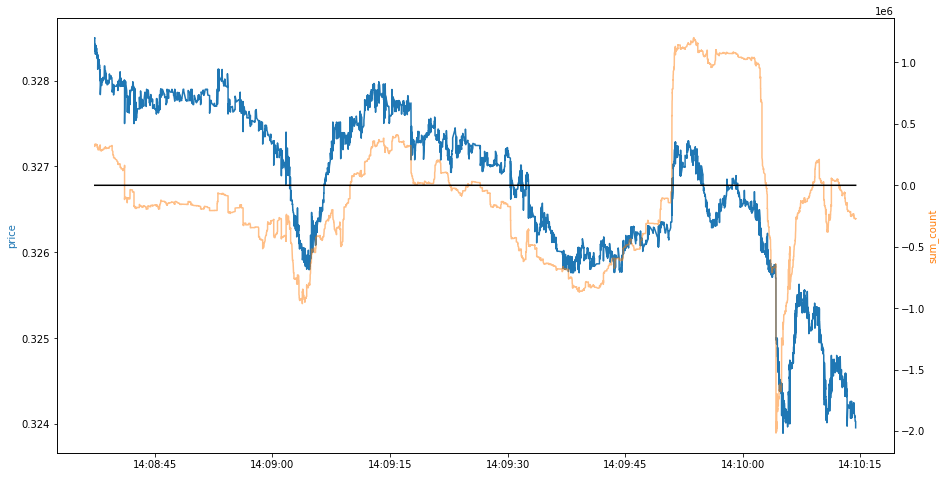

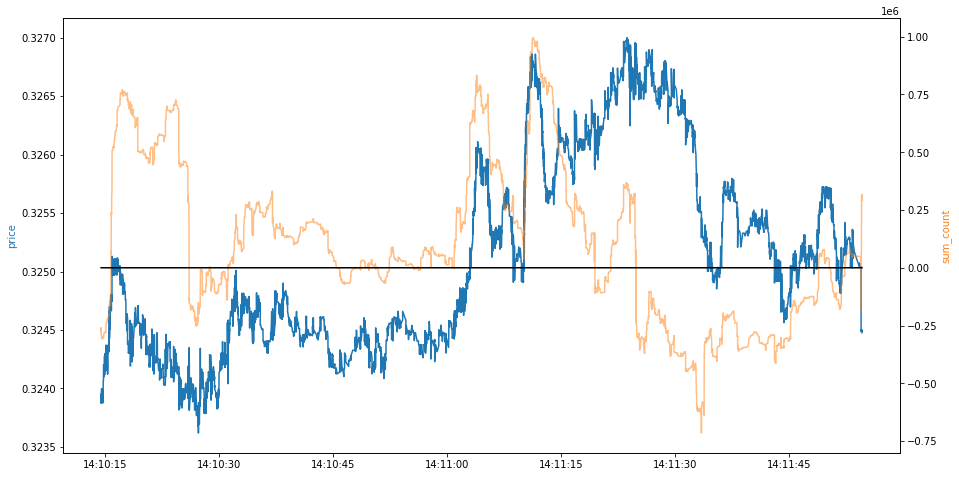

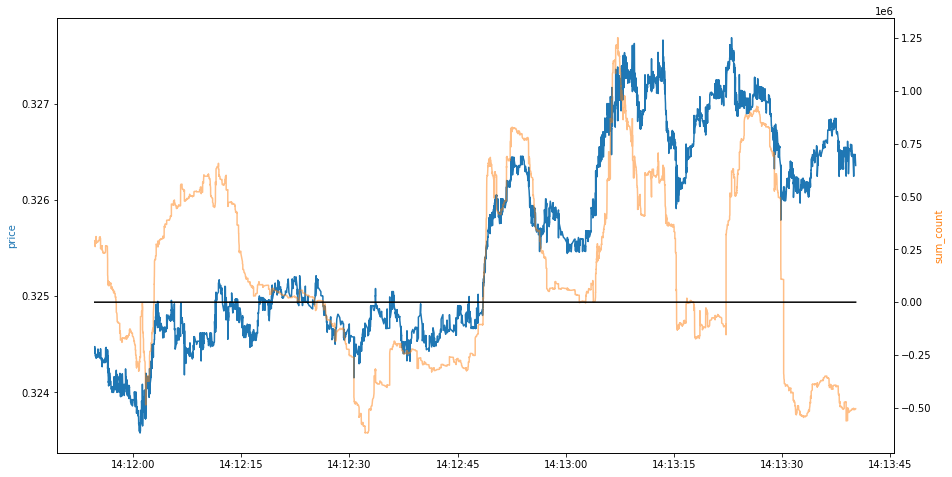

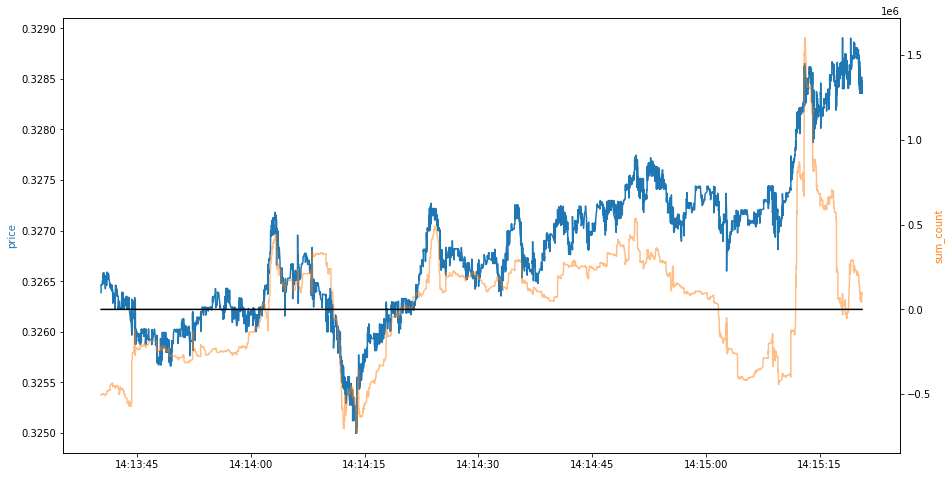

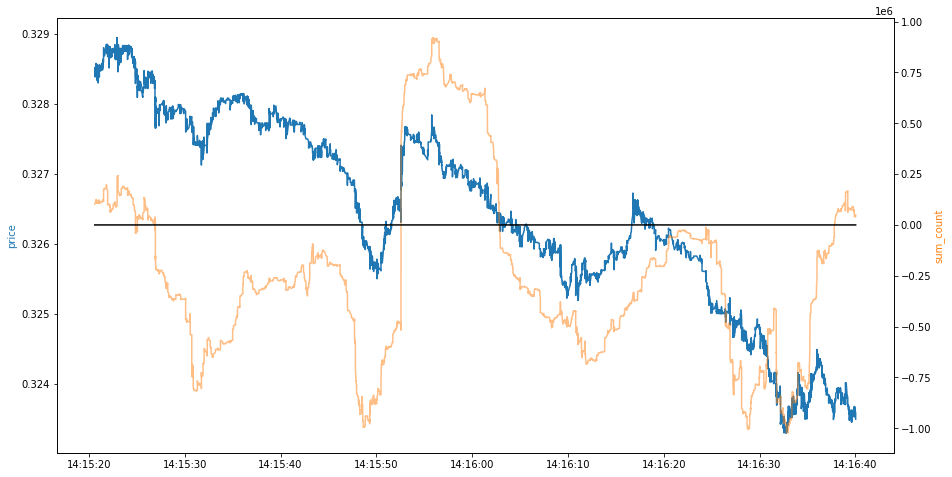

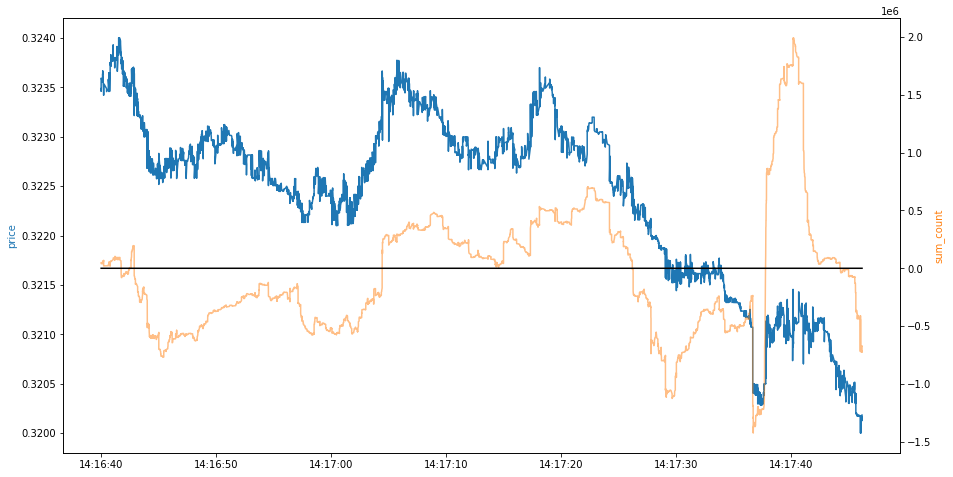

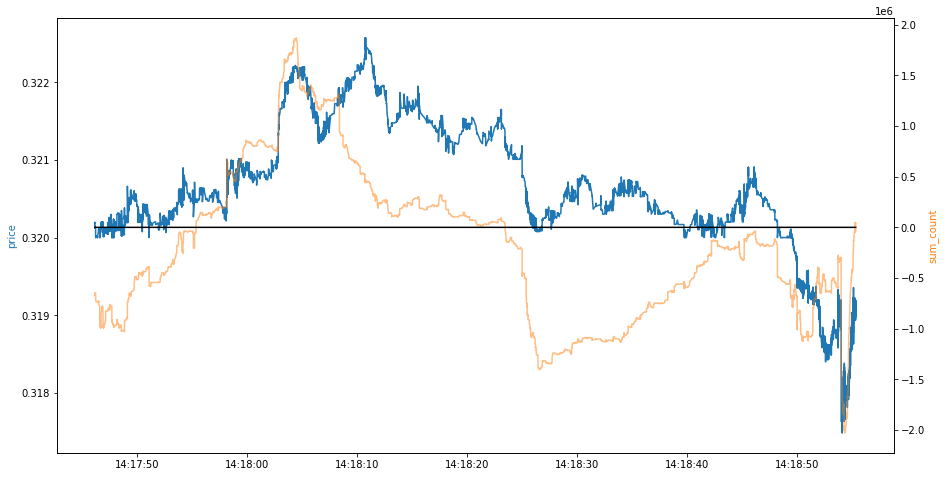

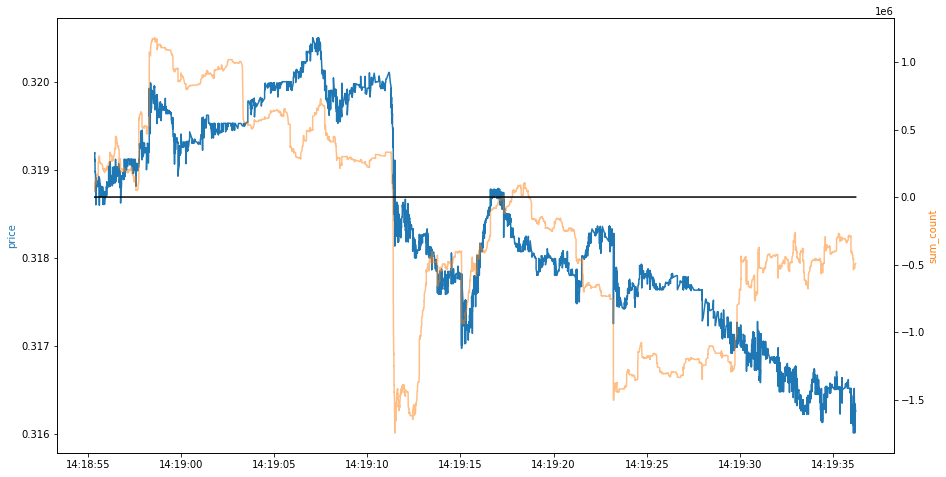

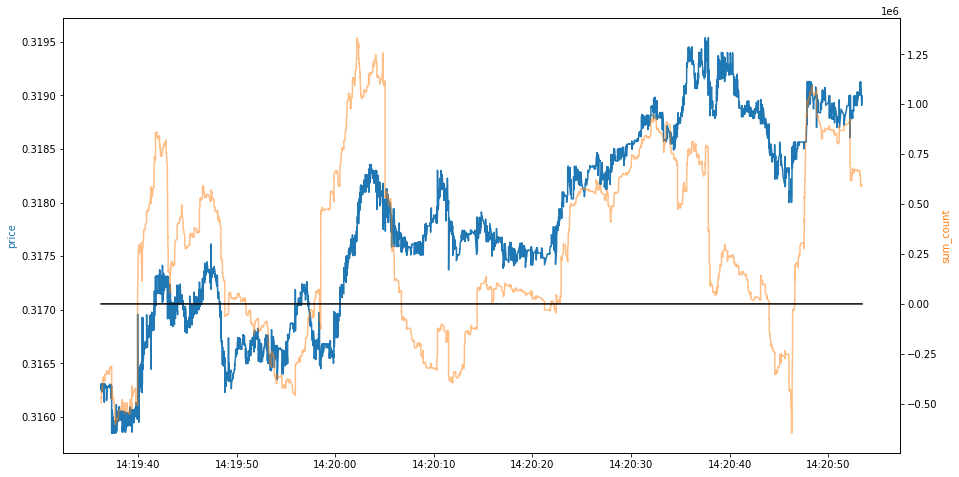

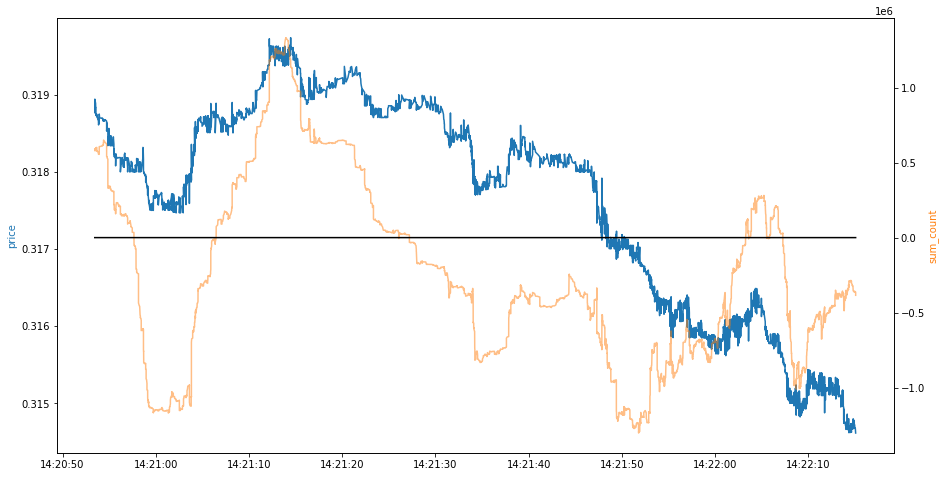

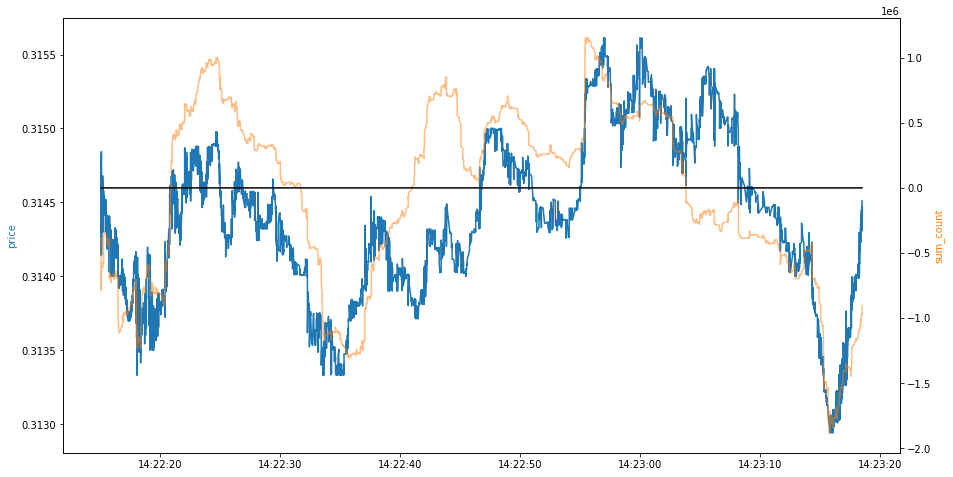

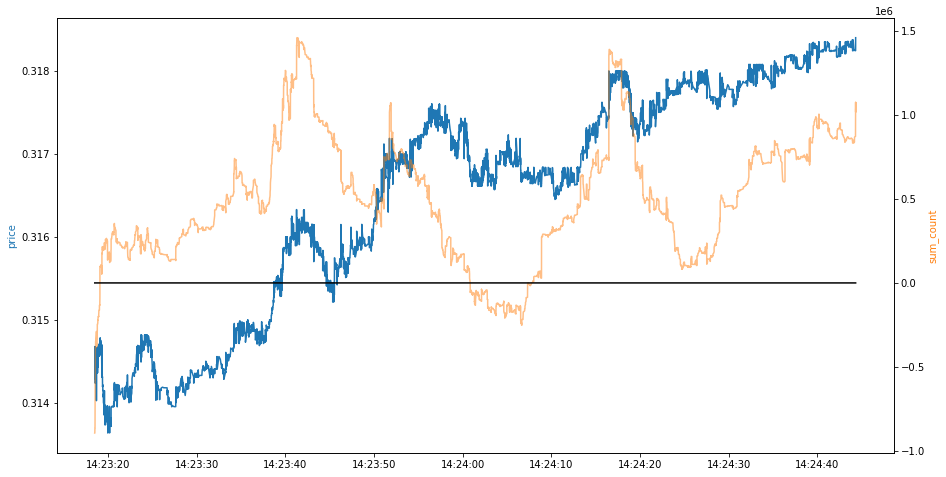

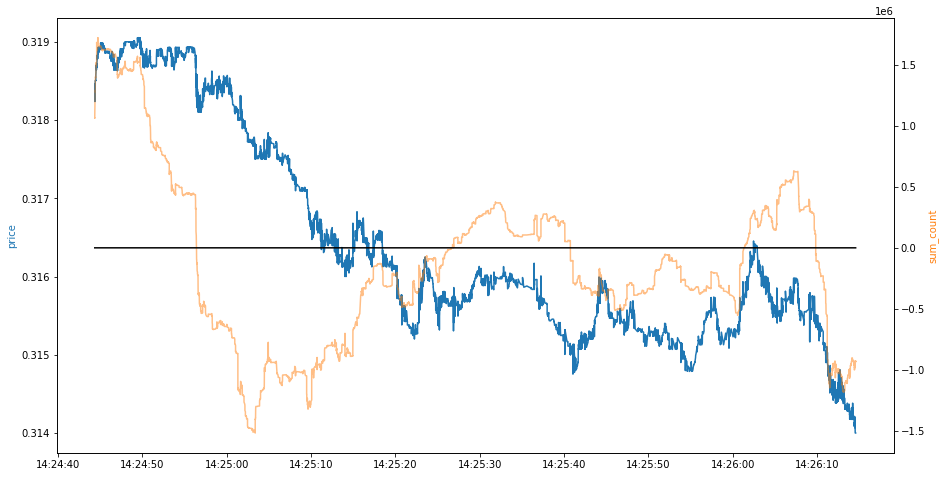

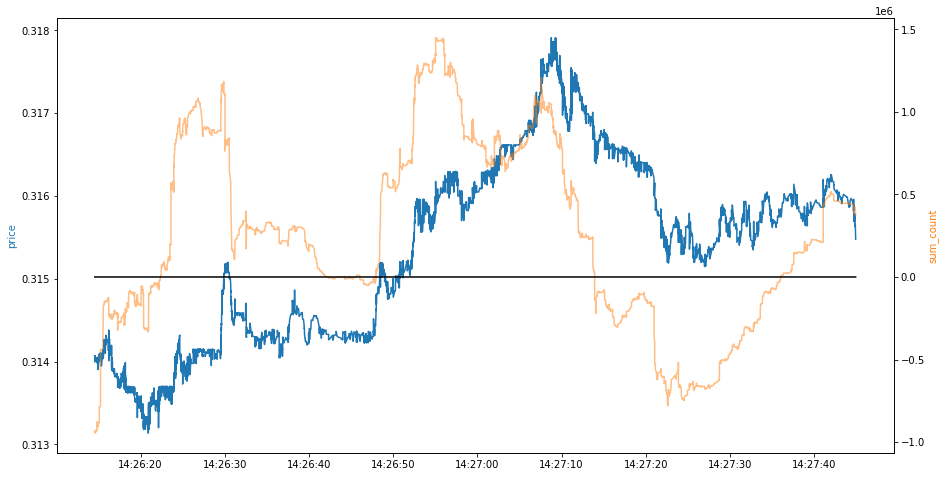

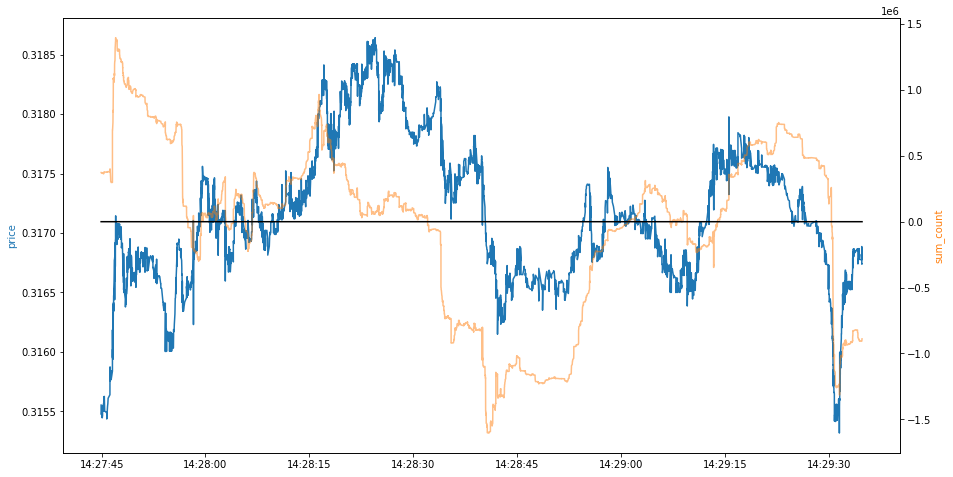

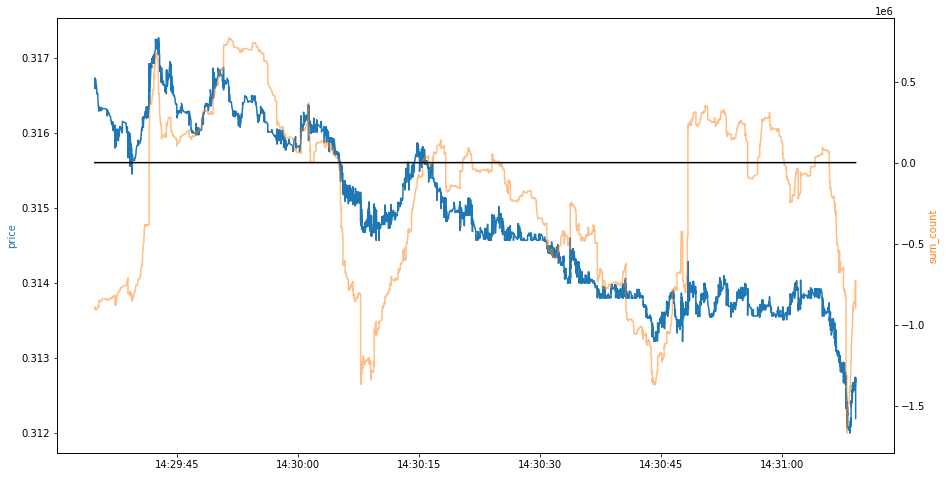

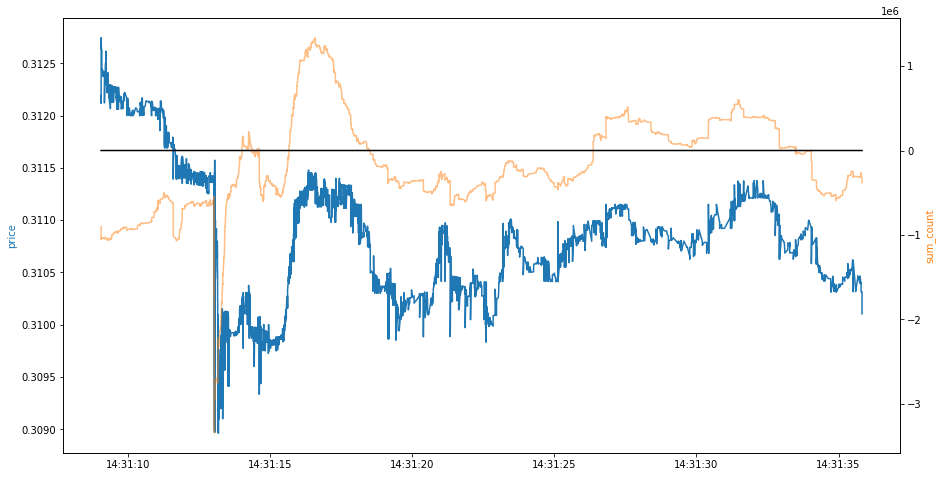

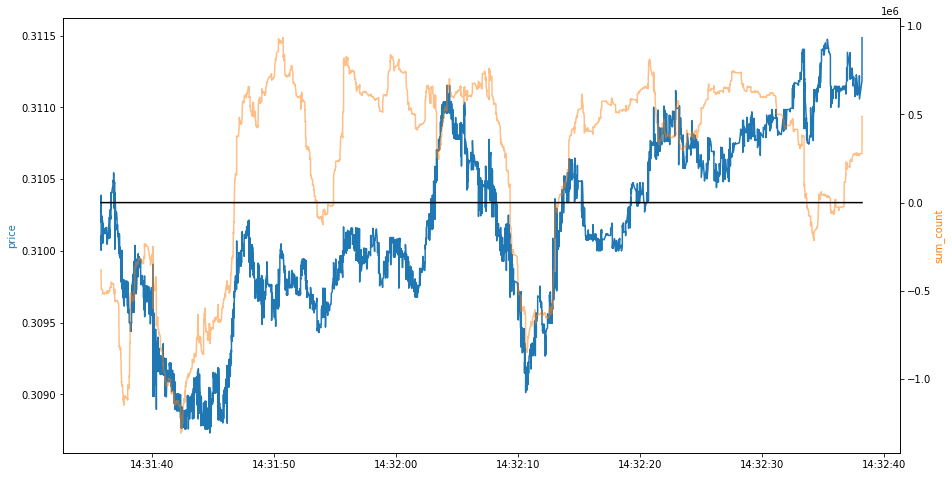

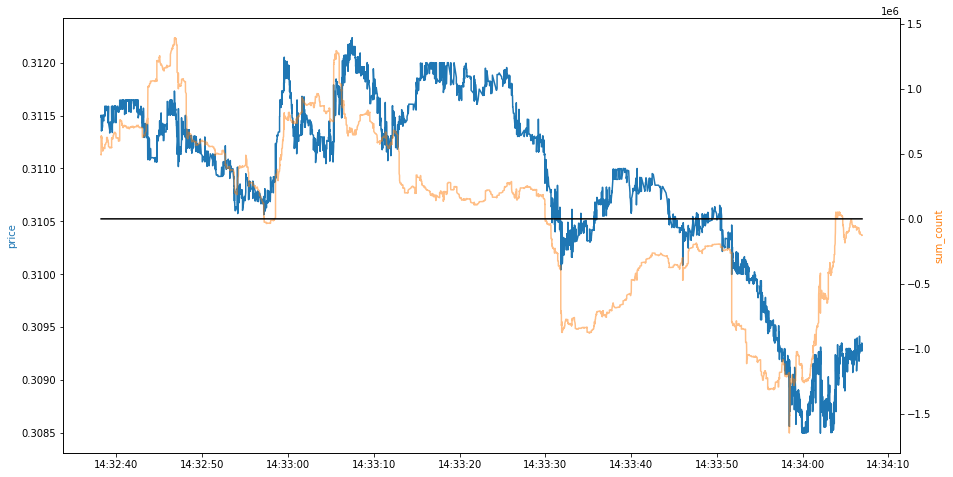

In [25]:
plot_window = 10000
for i in range(100):
    series1 = df["price"].iloc[ (i) * plot_window: (i + 1) * plot_window]
    series2 = df["sum_volume"].iloc[ (i) * plot_window: (i + 1) * plot_window]
    plot(series1, series2)